In [1]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the whole excel file
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

In [3]:
df.columns

Index(['Age group', 'ID', 'Age', 'Sex', 'Body height (cm)', 'Body weight (kg)',
       'BMI', 'BMI Category', 'Denture', 'Denture fit', 'N of teeth',
       'N of Rootremnance', 'N of Implant', 'Bact1', 'Bact2', 'Bact3', 'Dry1',
       'Dry2', 'Dry3', 'Prescale', 'Pa', 'Ta', 'Ka', 'ODK', 'TP1', 'TP2',
       'TP3', 'Glucosensor', 'EAT10', 'RG1', 'RG2', 'RG3', 'LG1', 'LG2',
       'LG3'],
      dtype='object')

In [4]:
# Adjust display options if needed
pd.options.display.max_columns = None

# Generate the summary statistics and round to 2 decimal places
summary_df = df.describe().round(2)
summary_df

,Age group,ID,Age,Body height (cm),Body weight (kg),BMI,N of teeth,N of Rootremnance,N of Implant,Bact1,Bact2,Bact3,Dry1,Dry2,Dry3,Prescale,Pa,Ta,Ka,ODK,TP1,TP2,TP3,Glucosensor,EAT10,RG1,RG2,RG3,LG1,LG2,LG3
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.0,126.00,126.00,126.00,126.00,125.00,125.00,125.00,124.00,124.00,124.00,124.00,124.00,126.00,126.00,126.00,122.00,126.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,3.56,64.24,51.32,169.49,76.04,26.36,22.44,0.1,0.28,3.77,3.77,3.60,27.74,28.31,28.28,629.82,5.76,5.76,5.43,5.65,29.64,31.87,32.12,149.52,0.75,30.75,29.61,28.38,29.24,28.02,27.04
std,1.74,36.85,19.08,10.76,17.35,5.12,7.93,0.5,1.06,1.48,1.46,1.36,3.25,2.88,3.06,419.56,1.31,1.37,1.24,1.20,12.29,12.68,11.74,74.06,2.04,12.95,12.92,12.56,12.70,12.20,11.91
min,1.00,1.00,21.00,144.00,40.00,15.62,0.00,0.0,0.00,1.00,1.00,1.00,7.00,5.80,6.30,67.30,2.20,2.80,1.80,2.80,2.30,1.40,0.70,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,32.25,33.25,162.25,62.25,23.04,18.00,0.0,0.00,3.00,3.00,3.00,26.80,27.40,28.00,308.58,5.20,5.00,4.60,4.98,21.50,24.18,22.82,88.50,0.00,21.27,20.64,19.55,20.73,19.78,18.82
50%,4.00,64.50,50.50,170.00,76.50,25.63,26.00,0.0,0.00,4.00,4.00,4.00,28.10,28.70,29.00,563.45,6.00,5.80,5.50,5.77,30.10,32.80,33.85,146.00,0.00,30.03,29.08,27.90,28.08,27.08,25.45
75%,5.00,95.75,67.00,178.00,87.25,29.09,28.00,0.0,0.00,5.00,5.00,5.00,29.80,29.70,29.70,863.68,6.60,6.60,6.20,6.53,39.35,42.42,40.52,201.25,0.00,37.83,37.47,36.24,35.97,35.83,33.48
max,6.00,127.00,93.00,190.00,125.00,43.50,34.00,4.0,8.00,6.00,6.00,6.00,33.00,33.10,32.70,1895.20,8.60,9.20,8.60,8.53,57.70,56.10,53.50,336.00,13.00,68.72,67.22,68.27,56.97,61.51,58.74


In [5]:
# Export the summary DataFrame to an Excel file
summary_df.to_excel('1.xlsx', index=True)

In [6]:
import pandas as pd

# Define the age group mapping
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}

# Map the 'Age group' in the dataframe
df['Age group'] = df['Age group'].map(age_group_mapping)

# Function to count values
def count_values(series):
    counts = series.value_counts()
    return {value: counts.get(value, 0) for value in counts.index}

# Group by 'Age group' and 'Sex' and aggregate the required metrics
demographic_table = df.groupby(['Age group', 'Sex']).agg({
    'Age group': 'size',  # Count entries
    'Body height (cm)': 'mean',
    'Body weight (kg)': 'mean',
    'BMI': 'mean',
    'BMI Category': lambda x: x.value_counts().to_dict(),  # Count occurrences of each BMI category
    'Denture': count_values,
    'Denture fit': count_values,
    'N of teeth': 'mean',
    'N of Rootremnance': lambda x: (x > 0).sum(),
    'N of Implant': lambda x: (x > 0).sum()
}).rename(columns={'Age group': 'Count'}).round(2)

# Display the demographic table
demographic_table


Count  Body height (cm)  Body weight (kg)    BMI  \
Age group Sex                                                        
20-29y    female     11            167.64             65.91  23.45   
          male       10            181.60             83.90  25.42   
30-39y    female     10            166.30             71.80  25.88   
          male       10            177.00             79.60  25.47   
40-49y    female     10            159.80             61.37  23.92   
          male       10            179.60             85.10  26.36   
50-59y    female     10            160.20             75.40  28.96   
          male       10            176.00             85.20  27.52   
60-69y    female     10            163.30             79.10  29.86   
          male       12            172.00             85.00  28.56   
70y+      female     13            159.62             63.95  25.02   
          male       10            173.50             79.00  26.11   

                                                       BMI Category  \
Age group Sex                                                         
20-29y    female  {'Normal weight': 8, 'Overweight': 2, 'Obesity...   
          male    {'Normal weight': 7, 'Overweight': 2, 'Obesity...   
30-39y    female  {'Normal weight': 7, 'Obesity class I': 2, 'Ob...   
          male    {'Normal weight': 4, 'Overweight': 4, 'Obesity...   
40-49y    female  {'Normal weight': 8, 'Overweight': 1, 'Obesity...   
          male                {'Overweight': 7, 'Normal weight': 3}   
50-59y    female  {'Overweight': 5, 'Obesity class I': 3, 'Obesi...   
          male    {'Overweight': 4, 'Normal weight': 3, 'Obesity...   
60-69y    female  {'Overweight': 3, 'Obesity class I': 3, 'Norma...   
          male    {'Overweight': 8, 'Normal weight': 2, 'Obesity...   
70y+      female  {'Normal weight': 6, 'Obesity class I': 3, 'Ov...   
          male    {'Normal weight': 6, 'Overweight': 2, 'Obesity...   

                              Denture             Denture fit  N of teeth  \
Age group Sex                                                               
20-29y    female           {'No': 11}                      {}       28.91   
          male             {'No': 10}                      {}       28.90   
30-39y    female  {'No': 9, 'Yes': 1}             {'Good': 1}       28.60   
          male    {'No': 9, 'Yes': 1}             {'Good': 1}       26.70   
40-49y    female  {'No': 9, 'Yes': 1}             {'Poor': 1}       25.90   
          male    {'No': 7, 'Yes': 3}             {'Good': 3}       23.50   
50-59y    female  {'No': 5, 'Yes': 5}  {'Good': 4, 'Poor': 1}       20.10   
          male    {'No': 5, 'Yes': 5}             {'Good': 5}       20.10   
60-69y    female  {'No': 8, 'Yes': 2}  {'Poor': 1, 'Good': 1}       20.30   
          male    {'Yes': 9, 'No': 3}  {'Good': 8, 'Poor': 1}       13.50   
70y+      female  {'Yes': 9, 'No': 4}  {'Good': 5, 'Poor': 4}       14.46   
          male    {'No': 6, 'Yes': 4}             {'Good': 4}       21.90   

                  N of Rootremnance  N of Implant  
Age group Sex                                      
20-29y    female                  0             0  
          male                    0             0  
30-39y    female                  1             0  
          male                    0             0  
40-49y    female                  0             0  
          male                    1             1  
50-59y    female                  0             0  
          male                    1             3  
60-69y    female                  0             2  
          male                    2             3  
70y+      female                  1             2  
          male                    1             0

In [7]:
def count_values(series):
    counts = series.value_counts()
    return {value: counts.get(value, 0) for value in counts.index}

# Group by 'Age group' and aggregate the required metrics
demographic_table = df.groupby('Age group').agg({
    'Age group': 'size',  # Count entries
    'Age': ['mean', 'std'], # Calculate mean and SD of age
    'Body height (cm)': 'mean',
    'Body weight (kg)': 'mean',
    'BMI': 'mean',
    'BMI Category': lambda x: x.value_counts().to_dict(),  # Count occurrences of each BMI category
    'Denture': count_values,
    'Denture fit': count_values,
    'N of teeth': 'mean',
    'N of Rootremnance': lambda x: (x > 0).sum(),
    'N of Implant': lambda x: (x > 0).sum()
}).rename(columns={'Age group': 'Count', 'Age': 'Age statistics'}).round(2)

# Flatten multi-level columns for readability
demographic_table.columns = ['_'.join(col).strip() for col in demographic_table.columns.values]

# Display the demographic table
demographic_table

,Count_size,Age statistics_mean,Age statistics_std,Body height (cm)_mean,Body weight (kg)_mean,BMI_mean,BMI Category_<lambda>,Denture_count_values,Denture fit_count_values,N of teeth_mean,N of Rootremnance_<lambda>,N of Implant_<lambda>
Age group,,,,,,,,,,,,
20-29y,21,24.57,1.99,174.29,74.48,24.39,"{'Normal weight': 15, 'Overweight': 4, 'Obesit...",{'No': 21},{},28.90,0,0
30-39y,20,34.65,4.60,171.65,75.70,25.67,"{'Normal weight': 11, 'Overweight': 4, 'Obesit...","{'No': 18, 'Yes': 2}",{'Good': 2},27.65,1,0
40-49y,20,45.65,3.00,169.70,73.24,25.14,"{'Normal weight': 11, 'Overweight': 8, 'Obesit...","{'No': 16, 'Yes': 4}","{'Good': 3, 'Poor': 1}",24.70,1,1
50-59y,20,54.20,2.98,168.10,80.30,28.24,"{'Overweight': 9, 'Obesity class I': 6, 'Norma...","{'No': 10, 'Yes': 10}","{'Good': 9, 'Poor': 1}",20.10,1,3
60-69y,22,65.55,2.97,168.05,82.32,29.15,"{'Overweight': 11, 'Normal weight': 4, 'Obesit...","{'Yes': 11, 'No': 11}","{'Good': 9, 'Poor': 2}",16.59,2,5
70y+,23,79.04,6.70,165.65,70.50,25.49,"{'Normal weight': 12, 'Obesity class I': 4, 'O...","{'Yes': 13, 'No': 10}","{'Good': 9, 'Poor': 4}",17.70,2,2


In [8]:
# Map the 'Age group' in the dataframe
df['Age group'] = df['Age group'].map(age_group_mapping)

# Function to count values
def count_values(series):
    counts = series.value_counts()
    return {value: counts.get(value, 0) for value in counts.index}

# Aggregate the entire dataframe without grouping by 'Age group'
overall_metrics = df.agg({
    'Age': ['mean', 'std'],  # Calculate mean and SD of age
    'Body height (cm)': 'mean',
    'Body weight (kg)': 'mean',
    'BMI': 'mean',
    'BMI Category': lambda x: x.value_counts().to_dict(),  # Count occurrences of each BMI category
    'Denture': count_values,
    'Denture fit': count_values,
    'N of teeth': 'mean',
    'N of Rootremnance': lambda x: (x > 0).sum(),
    'N of Implant': lambda x: (x > 0).sum()
}).round(2)

# Display the overall metrics
print("Overall Metrics for All Age Groups Combined:")
print(overall_metrics)

Overall Metrics for All Age Groups Combined:
                Age  Body height (cm)  Body weight (kg)    BMI  \
mean          51.32            169.49             76.04  26.36   
std           19.08               NaN               NaN    NaN   
<lambda>        NaN               NaN               NaN    NaN   
count_values    NaN               NaN               NaN    NaN   

                                                   BMI Category  \
mean                                                        NaN   
std                                                         NaN   
<lambda>      {'Normal weight': 57, 'Overweight': 40, 'Obesi...   
count_values                                                NaN   

                            Denture              Denture fit  N of teeth  \
mean                            NaN                      NaN       22.44   
std                             NaN                      NaN         NaN   
<lambda>                        NaN                      NaN

In [9]:
demographic_table.to_excel('2.xlsx')

In [10]:
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)
# Map the 'Age group' in the dataframe
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define a custom aggregation dictionary
agg_dict = {col: ['mean', 'std'] for col in numeric_columns}

# Grouping and aggregating the data
result = df.groupby(['Age group', 'Sex']).agg(agg_dict).round(2)

# Flattening the MultiIndex columns
result.columns = ['_'.join(col).strip() for col in result.columns.values]

result.round(2)


Bacteria_mean  Bacteria_std  Dryness_mean  Dryness_std  \
Age group Sex                                                              
20-29y    female           3.91          1.42         28.98         1.40   
          male             4.27          1.35         28.79         1.46   
30-39y    female           4.00          1.59         28.94         1.79   
          male             3.93          1.42         29.02         2.25   
40-49y    female           4.57          0.69         27.95         2.01   
          male             3.37          1.49         29.29         1.38   
50-59y    female           2.63          1.16         27.55         2.40   
          male             3.60          1.52         28.76         1.14   
60-69y    female           3.03          1.65         26.83         3.52   
          male             3.53          1.27         26.37         6.68   
70y+      female           3.92          1.19         27.57         1.85   
          male             3.73          1.11         27.77         1.98   

                  Prescale_mean  Prescale_std  Glucosensor_mean  \
Age group Sex                                                     
20-29y    female         764.09        145.91            216.91   
          male           953.79        391.19            225.20   
30-39y    female         858.35        605.12            171.90   
          male           952.64        421.15            180.67   
40-49y    female         546.49        401.66            113.90   
          male           610.81        325.04            187.50   
50-59y    female         632.96        407.48            120.10   
          male           542.58        524.68            111.10   
60-69y    female         401.46        241.80            111.00   
          male           415.17        248.99            125.64   
70y+      female         314.65        197.85            104.77   
          male           634.49        475.91            130.10   

                  Glucosensor_std  EAT10_mean  EAT10_std  TonguePressure_mean  \
Age group Sex                                                                   
20-29y    female            53.24        0.36       0.92                35.17   
          male              94.74        0.10       0.32                38.85   
30-39y    female            37.56        0.10       0.32                32.19   
          male              61.81        0.00       0.00                37.68   
40-49y    female            48.34        1.00       2.16                30.16   
          male              48.23        0.40       1.26                35.35   
50-59y    female            81.64        0.70       1.57                32.07   
          male              47.79        0.30       0.95                33.10   
60-69y    female            56.03        1.50       3.17                28.80   
          male              54.82        0.58       1.08                27.88   
70y+      female            62.20        1.62       2.26                18.02   
          male              88.74        2.20       4.73                29.51   

                  TonguePressure_std  RightGrip_mean  RightGrip_std  \
Age group Sex                                                         
20-29y    female                7.25           30.76           3.35   
          male                 12.92           49.43           9.02   
30-39y    female               10.26           21.47           6.08   
          male                 11.92           44.33           7.29   
40-49y    female               10.27           23.52          11.51   
          male                  9.90           37.35          12.58   
50-59y    female               12.46           22.67           5.01   
          male                  7.63           35.57          13.31   
60-69y    female               10.80           19.88           6.29   
          male                 15.22           32.03           6.24   
70y+      female           

In [11]:
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define a custom aggregation dictionary
agg_dict = {col: ['mean', 'std'] for col in numeric_columns}

# Grouping and aggregating the data
result = df.groupby(['Age group']).agg(agg_dict).round(2)

# Flattening the MultiIndex columns
result.columns = ['_'.join(col).strip() for col in result.columns.values]

result.round(2)

,Bacteria_mean,Bacteria_std,Dryness_mean,Dryness_std,Prescale_mean,Prescale_std,Glucosensor_mean,Glucosensor_std,EAT10_mean,EAT10_std,TonguePressure_mean,TonguePressure_std,RightGrip_mean,RightGrip_std,LeftGrip_mean,LeftGrip_std,ODK_mean,ODK_std
Age group,,,,,,,,,,,,,,,,,,
1,4.08,1.37,28.90,1.39,854.42,298.22,220.86,73.99,0.24,0.70,36.92,10.24,39.16,11.45,33.89,10.57,6.70,0.84
2,3.97,1.47,28.98,1.98,905.50,509.71,176.05,49.23,0.05,0.22,34.93,11.18,32.90,13.42,32.57,15.14,6.05,1.04
3,3.97,1.29,28.62,1.81,578.65,357.15,150.70,60.28,0.70,1.75,32.76,10.17,30.43,13.71,29.96,13.99,5.90,0.87
4,3.12,1.41,28.16,1.93,587.77,459.56,115.60,65.27,0.50,1.28,32.58,10.07,29.12,11.82,27.69,10.31,5.36,1.27
5,3.30,1.44,26.58,5.36,409.30,239.86,119.47,54.27,1.00,2.27,28.29,13.10,26.51,8.70,25.17,7.38,5.23,1.19
6,3.84,1.13,27.66,1.87,460.03,379.66,115.78,74.14,1.87,3.47,23.01,10.96,20.96,9.73,20.73,10.20,4.80,0.96


In [12]:
from scipy.stats import ttest_ind
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)
# Define columns for mean calculation
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK', 'Prescale', 'EAT10', 'Glucosensor'
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Age group' and 'Sex' and calculate p-values for differences between males (M) and females (F)
p_values = {}

for col in numeric_columns:
    p_values[col] = {}
    for age_group, group_df in df.groupby('Age group'):
        male_data = group_df[group_df['Sex'] == 'M'][col]
        female_data = group_df[group_df['Sex'] == 'F'][col]
        
        # Perform independent t-test
        t_stat, p_value = ttest_ind(male_data, female_data)
        p_values[col][age_group] = p_value

# Display the p-values
print("P-values for differences between males (M) and females (F) within each age group:")
for col, age_group_pvalues in p_values.items():
    print(f"{col}:")
    for age_group, p_value in age_group_pvalues.items():
        print(f"  Age group {age_group}: p-value = {p_value:.4f}")

P-values for differences between males (M) and females (F) within each age group:
Bacteria:
  Age group 1: p-value = nan
  Age group 2: p-value = nan
  Age group 3: p-value = nan
  Age group 4: p-value = nan
  Age group 5: p-value = nan
  Age group 6: p-value = nan
Dryness:
  Age group 1: p-value = nan
  Age group 2: p-value = nan
  Age group 3: p-value = nan
  Age group 4: p-value = nan
  Age group 5: p-value = nan
  Age group 6: p-value = nan
TonguePressure:
  Age group 1: p-value = nan
  Age group 2: p-value = nan
  Age group 3: p-value = nan
  Age group 4: p-value = nan
  Age group 5: p-value = nan
  Age group 6: p-value = nan
RightGrip:
  Age group 1: p-value = nan
  Age group 2: p-value = nan
  Age group 3: p-value = nan
  Age group 4: p-value = nan
  Age group 5: p-value = nan
  Age group 6: p-value = nan
LeftGrip:
  Age group 1: p-value = nan
  Age group 2: p-value = nan
  Age group 3: p-value = nan
  Age group 4: p-value = nan
  Age group 5: p-value = nan
  Age group 6: p-valu

In [13]:
import pandas as pd
from scipy.stats import ttest_ind

# Ensure numeric columns are numeric
numeric_columns = ['Bacteria', 'Dryness', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate overall means for each age group combining both sexes
overall_means = df.groupby('Age group')[numeric_columns].mean().round(2)
print("Overall means combining both sexes:")
print(overall_means)


Overall means combining both sexes:
           Bacteria  Dryness  TonguePressure  RightGrip  LeftGrip   ODK
Age group                                                              
1              4.08    28.90           36.92      39.16     33.89  6.70
2              3.97    28.98           34.93      32.90     32.57  6.05
3              3.97    28.62           32.76      30.43     29.96  5.90
4              3.12    28.16           32.58      29.12     27.69  5.36
5              3.30    26.58           28.29      26.51     25.17  5.23
6              3.84    27.66           23.01      20.96     20.73  4.80


In [14]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]
def check_oral_hypofunction(row):
    conditions = [
        row['Bacteria'] >= 2,
        row['Dryness'] < 27,
        row['Prescale'] < 200,
        row['ODK'] < 6,
        row['TonguePressure'] < 30,
        row['Glucosensor'] < 100,
        row['EAT10'] >= 3
    ]
    return sum(conditions) >= 3

# Apply the function row-wise
df['Oral_hypofunction'] = df.apply(check_oral_hypofunction, axis=1)

# Group by Age group and Sex, then count the occurrences of True values in Oral_hypofunction
oral_hypofunction_counts = df.groupby(['Age group', 'Sex'])['Oral_hypofunction'].agg(['sum', 'size'])

# Rename the columns
oral_hypofunction_counts = oral_hypofunction_counts.rename(columns={'sum': 'N of Participants with Oral Hypofunction', 'size': 'Total N of Participants'})

# Calculate the percentage
oral_hypofunction_counts['%'] = (oral_hypofunction_counts['N of Participants with Oral Hypofunction'] / oral_hypofunction_counts['Total N of Participants']) * 100

oral_hypofunction_counts.round(2)

N of Participants with Oral Hypofunction  \
Age group Sex                                                
1         female                                         1   
          male                                           1   
2         female                                         3   
          male                                           2   
3         female                                         7   
          male                                           3   
4         female                                         7   
          male                                           5   
5         female                                         6   
          male                                           9   
6         female                                        12   
          male                                           8   

                  Total N of Participants      %  
Age group Sex                                     
1         female                       11   9.09  
          male                         10  10.00  
2         female                       10  30.00  
          male                         10  20.00  
3         female                       10  70.00  
          male                         10  30.00  
4         female                       10  70.00  
          male                         10  50.00  
5         female                       10  60.00  
          male                         12  75.00  
6         female                       13  92.31  
          male                         10  80.00

Conditions_failed  0   1  2  3  4  5  6
Age group                              
1                  1  10  8  2  0  0  0
2                  1   6  8  2  2  1  0
3                  1   6  3  6  3  0  1
4                  0   1  7  7  3  2  0
5                  0   2  5  8  4  2  1
6                  0   1  2  6  7  7  0


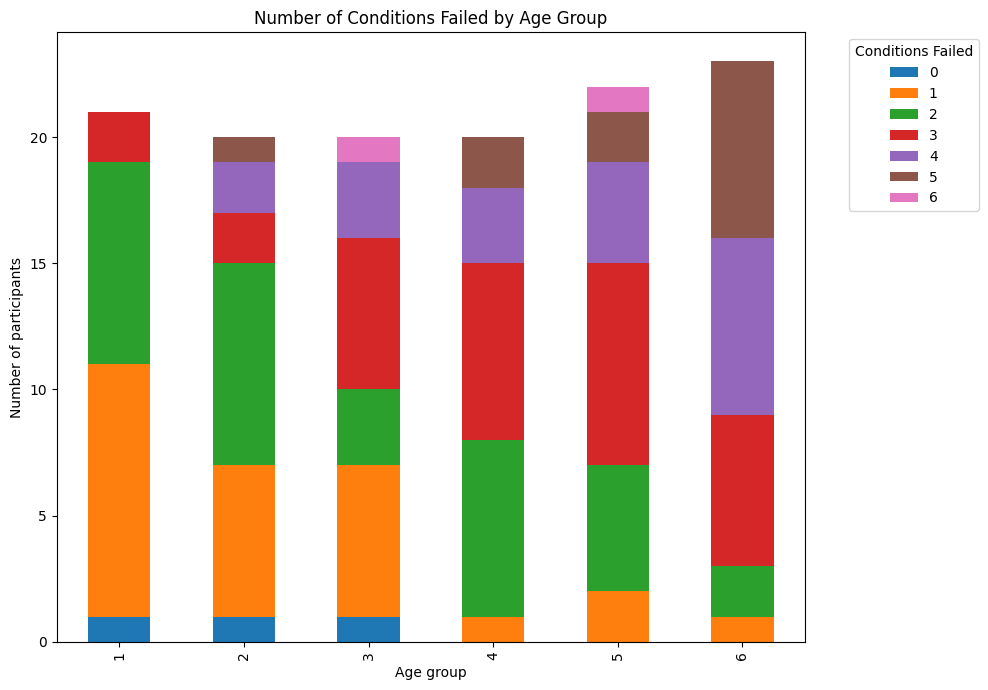

In [15]:
# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensuring the columns used in the aggregation are numeric
numeric_columns = [
    'Bacteria', 'Dryness', 'Prescale', 'Glucosensor', 'EAT10',
    'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK'
]
def check_oral_hypofunction(row):
    conditions = [
        row['Bacteria'] >= 2,
        row['Dryness'] < 27,
        row['Prescale'] < 200,
        row['ODK'] < 6,
        row['TonguePressure'] < 30,
        row['Glucosensor'] < 100,
        row['EAT10'] >= 3
    ]
    return sum(conditions)

# Apply the function row-wise to count the number of conditions failed by each individual
df['Conditions_failed'] = df.apply(check_oral_hypofunction, axis=1)

# Group by age group and count the number of individuals failing a certain number of conditions
failures_by_age_group = df.groupby(['Age group', 'Conditions_failed']).size().unstack(fill_value=0)

# Display the result
print(failures_by_age_group)

# Visualize the data with a stacked bar plot and adjust the legend placement
ax = failures_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Age group')
plt.ylabel('Number of participants')
plt.title('Number of Conditions Failed by Age Group')
plt.legend(title='Conditions Failed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('number_of_conditions_failed_by_age_group.pdf', format='pdf', dpi=300)
plt.savefig('number_of_conditions_failed_by_age_group.png', format='png', dpi=300)
plt.show()


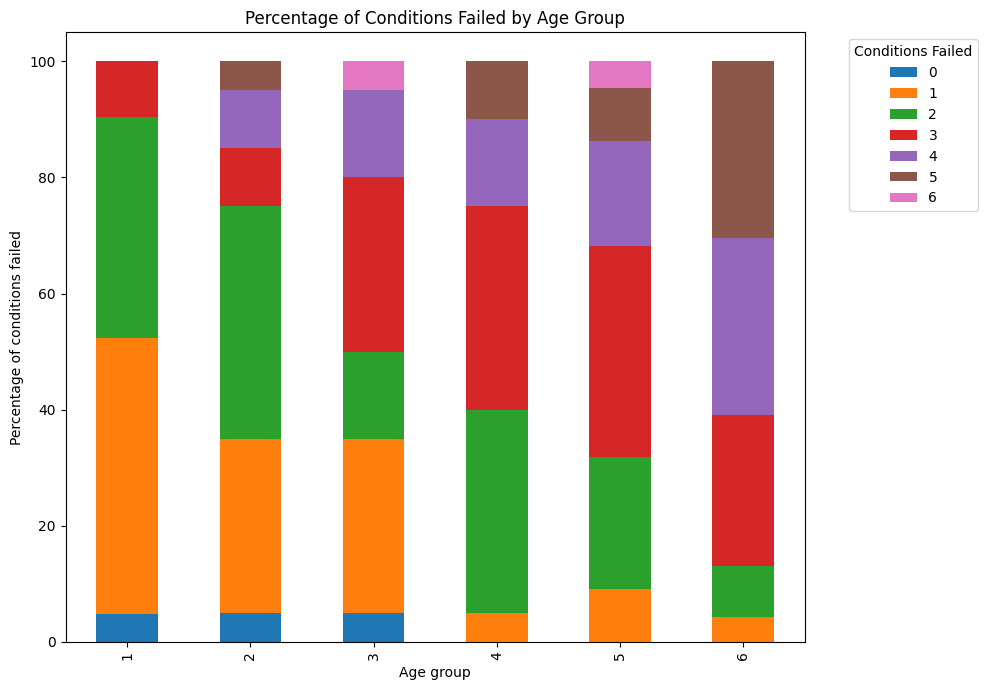

In [17]:
# Normalize the data to create a 100% stacked bar plot
normalized_data = failures_by_age_group.div(failures_by_age_group.sum(axis=1), axis=0) * 100

# Visualize the data with a 100% stacked bar plot
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Age group')
plt.ylabel('Percentage of conditions failed')
plt.title('Percentage of Conditions Failed by Age Group')
plt.legend(title='Conditions Failed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
oral_hypofunction_counts.to_excel('4.xlsx')

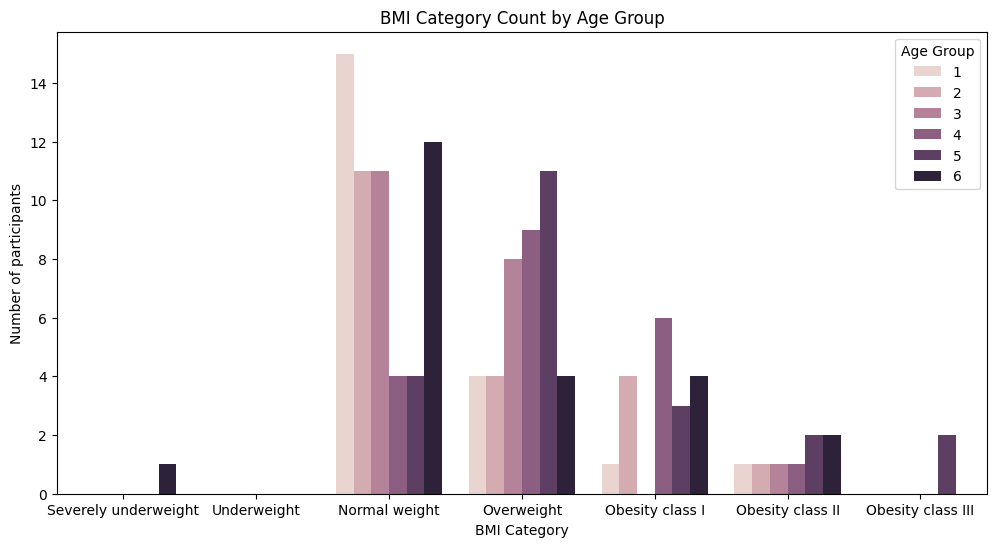

In [16]:
# Define the order of the BMI categories
bmi_order = ['Severely underweight', 'Underweight', 'Normal weight', 'Overweight', 'Obesity class I','Obesity class II','Obesity class III']

# Convert BMI Category to a categorical type with the defined order
df['BMI Category'] = pd.Categorical(df['BMI Category'], categories=bmi_order, ordered=True)

# Plotting the BMI Category count by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BMI Category', hue='Age group', order=bmi_order)
plt.title('BMI Category Count by Age Group')
plt.xlabel('BMI Category')
plt.ylabel('Number of participants')
plt.legend(title='Age Group')
plt.savefig('bmi_category_count_by_age_group.pdf', format='pdf', dpi=300)
plt.savefig('bmi_category_count_by_age_group.png', format='png', dpi=300)
plt.show()

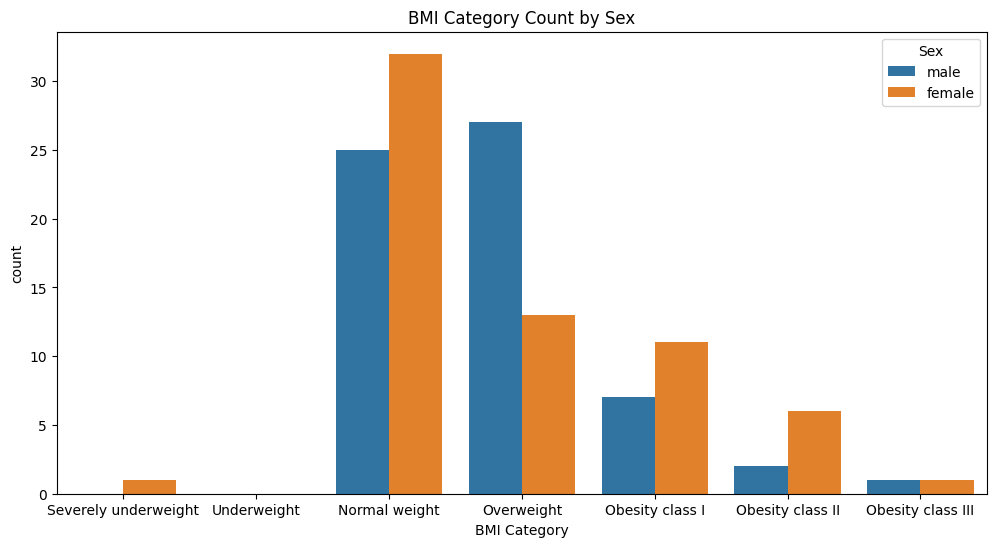

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BMI Category', hue='Sex')
plt.title('BMI Category Count by Sex')
plt.savefig('bmi_category_count_by_sex.pdf', format='pdf', dpi=300)
plt.savefig('bmi_category_count_by_age_sex.png', format='png', dpi=300)
plt.show()

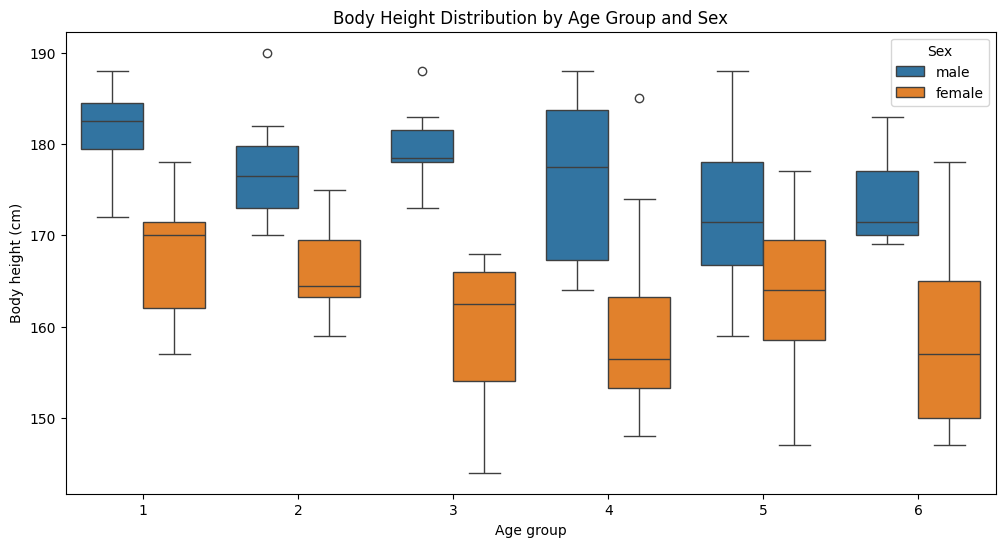

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age group', y='Body height (cm)', hue='Sex')
plt.title('Body Height Distribution by Age Group and Sex')
plt.savefig('body_height_distribution_by_age_group_and_sex.pdf', format='pdf', dpi=300)
plt.savefig('body_height_distribution_by_age_group_and_sex.png', format='png', dpi=300)
plt.show()

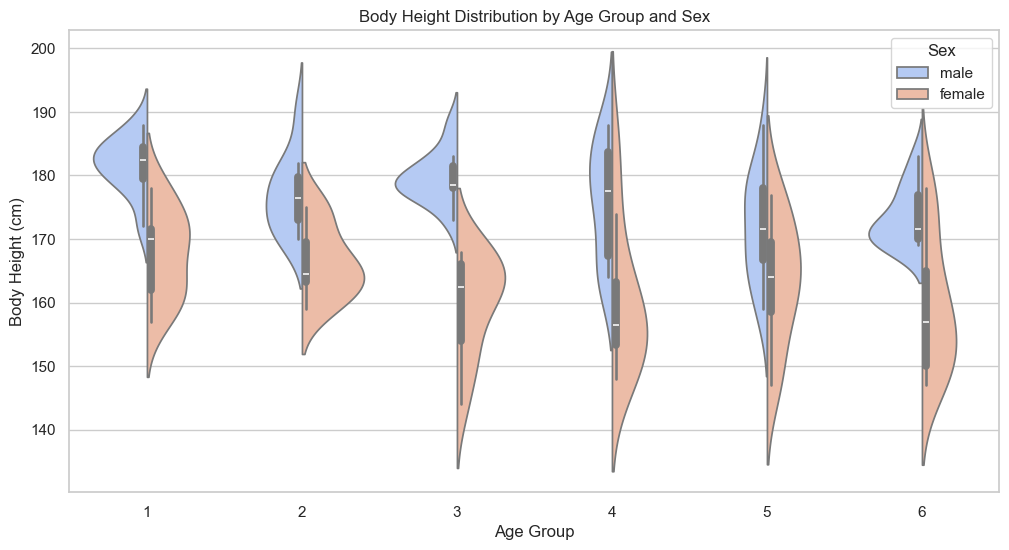

In [22]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(data=df, x='Age group', y='Body height (cm)', hue='Sex', split=True, palette='coolwarm')
plt.title('Body Height Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Body Height (cm)')
plt.legend(title='Sex')
plt.savefig('body_height_distribution_by_age_group_and_sex_violin.pdf', format='pdf', dpi=300)
plt.savefig('body_height_distribution_by_age_group_and_sex_violin.png', format='png', dpi=300)
plt.show()

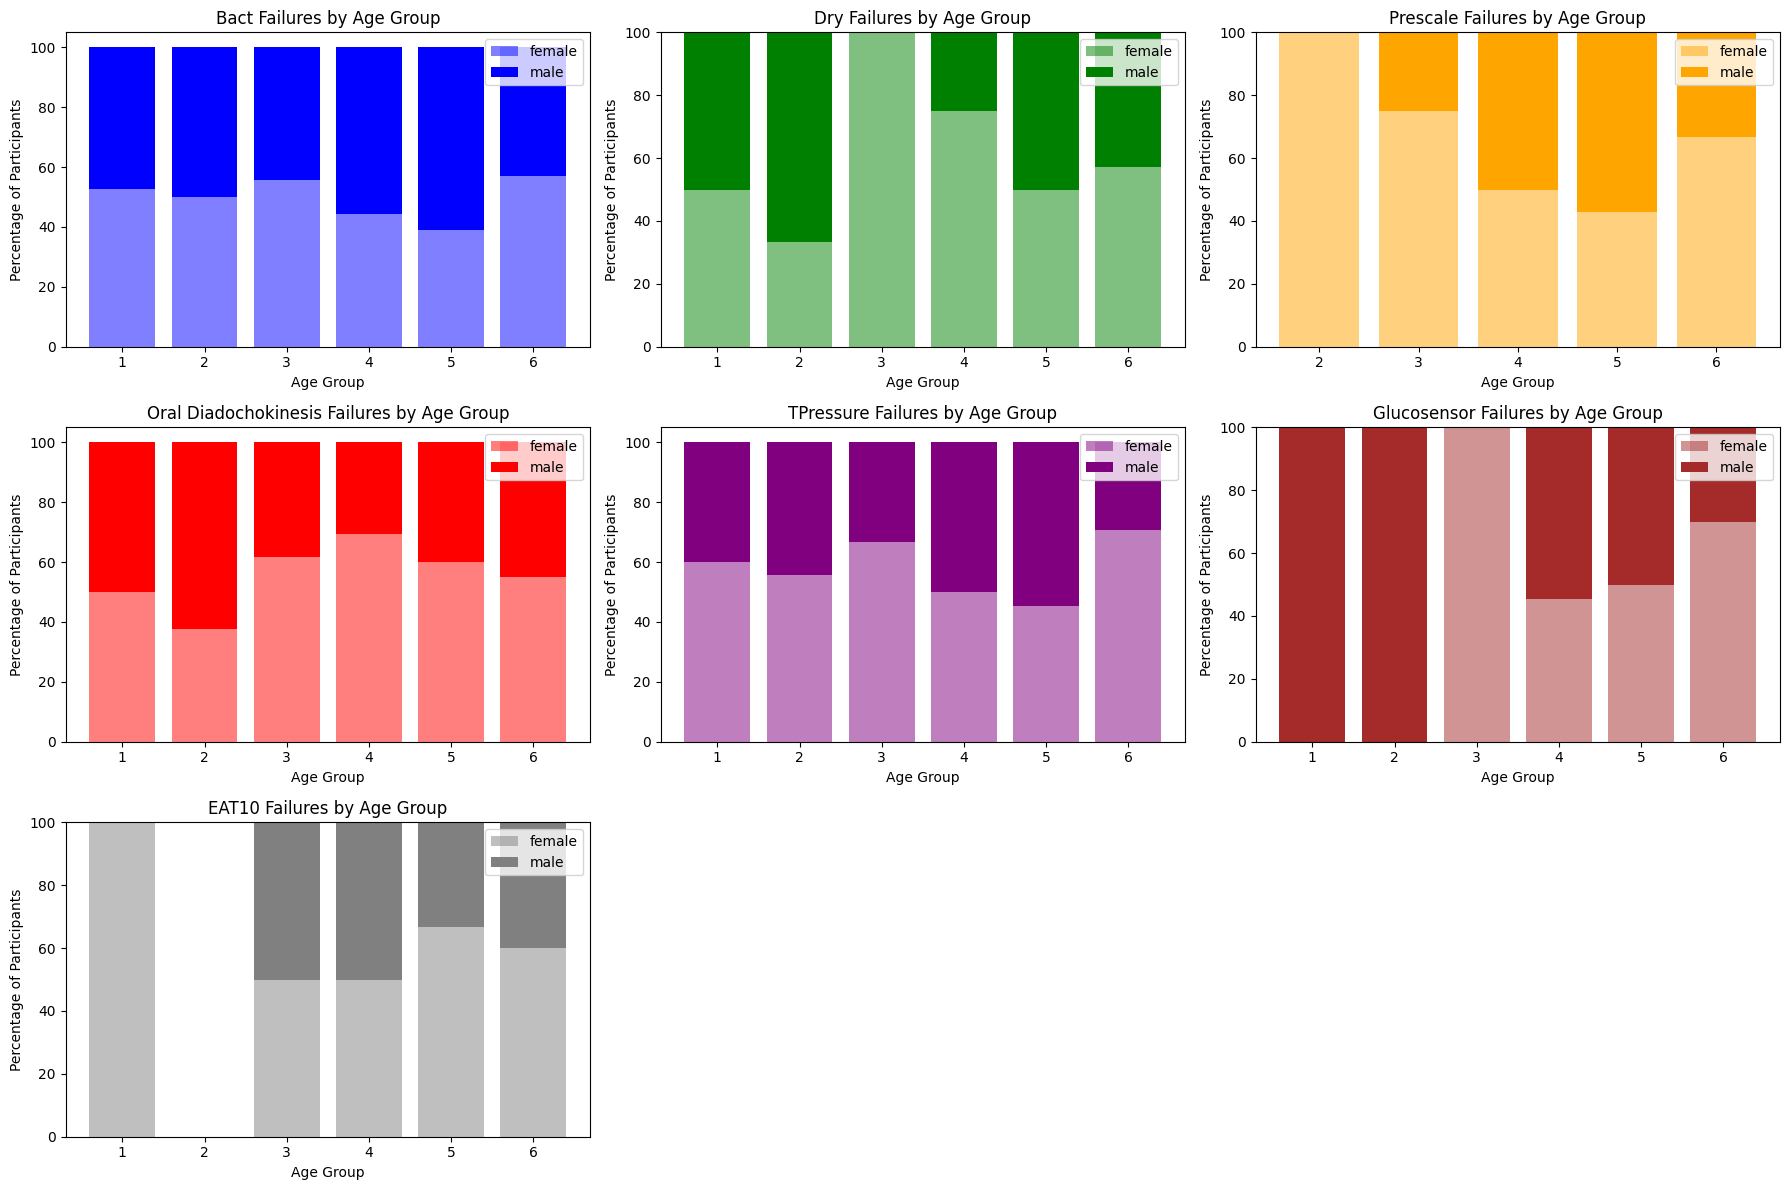

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define functions to check oral hypofunction
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Helper function to calculate the percentage of failures by sex
def calculate_sex_percentage(failures_df, condition_col):
    sex_distribution = failures_df.groupby(['Age group', 'Sex']).size().unstack(fill_value=0).reset_index()
    sex_distribution.columns.name = None  # Remove the name of the index column
    sex_distribution['Total_failures'] = sex_distribution['female'] + sex_distribution['male']
    sex_distribution['Female_percentage'] = (sex_distribution['female'] / sex_distribution['Total_failures']) * 100
    sex_distribution['Male_percentage'] = (sex_distribution['male'] / sex_distribution['Total_failures']) * 100
    return sex_distribution

# Calculate the distribution of failures by age group and sex for each condition
failures_by_age_group_bact = calculate_sex_percentage(df[df['Oral_hypofunction_bact']], 'Oral_hypofunction_bact')
failures_by_age_group_dry = calculate_sex_percentage(df[df['Oral_hypofunction_dry']], 'Oral_hypofunction_dry')
failures_by_age_group_prescale = calculate_sex_percentage(df[df['Oral_hypofunction_prescale']], 'Oral_hypofunction_prescale')
failures_by_age_group_oral_diadochokinesis = calculate_sex_percentage(df[df['Oral_hypofunction_oral_diadochokinesis']], 'Oral_hypofunction_oral_diadochokinesis')
failures_by_age_group_tpressure = calculate_sex_percentage(df[df['Oral_hypofunction_tpressure']], 'Oral_hypofunction_tpressure')
failures_by_age_group_glucosensor = calculate_sex_percentage(df[df['Oral_hypofunction_glucosensor']], 'Oral_hypofunction_glucosensor')
failures_by_age_group_eat10 = calculate_sex_percentage(df[df['Oral_hypofunction_eat10']], 'Oral_hypofunction_eat10')

# Define a plotting function with different gradients for male and female
def plot_failures(axes, row, col, data, condition, color):
    female_color = color + "80"  # Light shade
    male_color = color  # Original color
    axes[row, col].bar(data['Age group'], data['Female_percentage'], color=female_color, label='female')
    axes[row, col].bar(data['Age group'], data['Male_percentage'], bottom=data['Female_percentage'], color=male_color, label='male')
    axes[row, col].set_title(f'{condition} Failures by Age Group')
    axes[row, col].set_xlabel('Age Group')
    axes[row, col].set_ylabel('Percentage of Participants')
    axes[row, col].legend()

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

plot_failures(axes, 0, 0, failures_by_age_group_bact, 'Bact', '#0000FF')  # Blue
plot_failures(axes, 0, 1, failures_by_age_group_dry, 'Dry', '#008000')  # Green
plot_failures(axes, 0, 2, failures_by_age_group_prescale, 'Prescale', '#FFA500')  # Orange
plot_failures(axes, 1, 0, failures_by_age_group_oral_diadochokinesis, 'Oral Diadochokinesis', '#FF0000')  # Red
plot_failures(axes, 1, 1, failures_by_age_group_tpressure, 'TPressure', '#800080')  # Purple
plot_failures(axes, 1, 2, failures_by_age_group_glucosensor, 'Glucosensor', '#A52A2A')  # Brown
plot_failures(axes, 2, 0, failures_by_age_group_eat10, 'EAT10', '#808080')  # Gray

# Hide the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('Failure_by_Age_group.pdf', format='pdf', dpi=300)
plt.savefig('Failure_by_Age_group.png', format='png', dpi=300)
# Show plot
plt.show()

In [23]:
def check_oral_hypofunction(row):
    # Preprocess columns to handle missing values and eliminate non-numeric values
    bact_mean = row['Bacteria']
    dry_mean = row['Dryness']
    prescale = row['Prescale']
    pataka_mean = row['ODK']
    tpressure_mean = row['TonguePressure']
    glucosensor = row['Glucosensor']
    eat10 = row['EAT10']
    
    # Check for missing or non-numeric values
    if pd.isna(bact_mean) or pd.isna(dry_mean) or pd.isna(prescale) or pd.isna(pataka_mean) or pd.isna(tpressure_mean) or pd.isna(glucosensor) or pd.isna(eat10):
        return False
    
    # Check for non-numeric values
    if not all(isinstance(val, (int, float)) for val in [bact_mean, dry_mean, prescale, pataka_mean, tpressure_mean, glucosensor, eat10]):
        return False
    
    # Check conditions
    conditions = [
        bact_mean >= 2,
        dry_mean < 27,
        prescale < 200,
        pataka_mean < 6,
        tpressure_mean < 30,
        glucosensor < 100,
        eat10 >= 3
    ]
    return sum(conditions)

# Apply the function row-wise
df['Conditions_Met'] = df.apply(check_oral_hypofunction, axis=1)

C:\Users\lisat\AppData\Local\Temp\ipykernel_38700\1669849144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Conditions_Met', y='Age group', orient='h', palette='coolwarm')


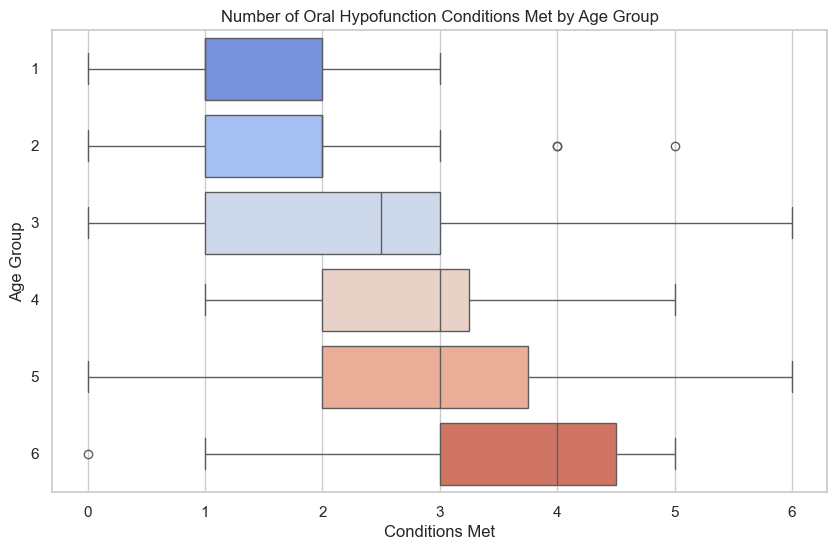

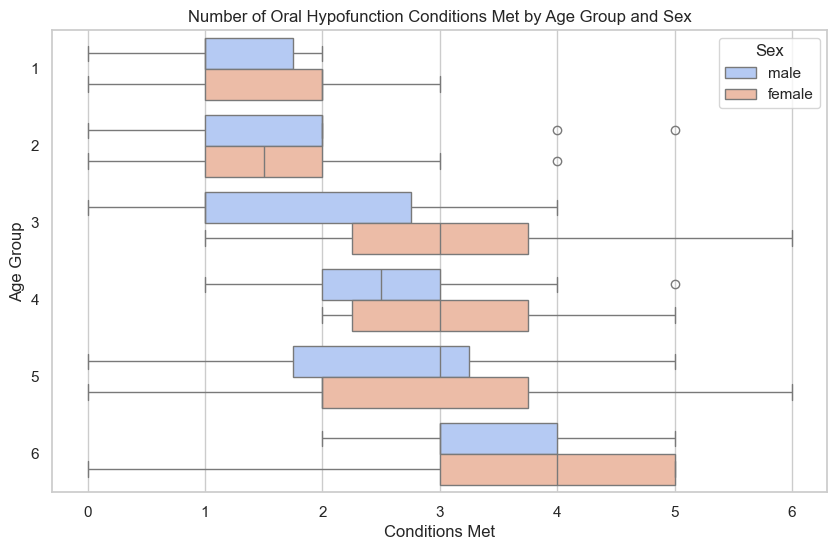

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conditions_Met', y='Age group', orient='h', palette='coolwarm')
plt.title('Number of Oral Hypofunction Conditions Met by Age Group')
plt.xlabel('Conditions Met')
plt.ylabel('Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Conditions_Met', y='Age group', hue='Sex', orient='h', palette='coolwarm')
plt.title('Number of Oral Hypofunction Conditions Met by Age Group and Sex')
plt.xlabel('Conditions Met')
plt.ylabel('Age Group')
plt.show()

C:\Users\lisat\AppData\Local\Temp\ipykernel_38700\1503498028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Conditions_Met', y='Age group', orient='h', palette='coolwarm')


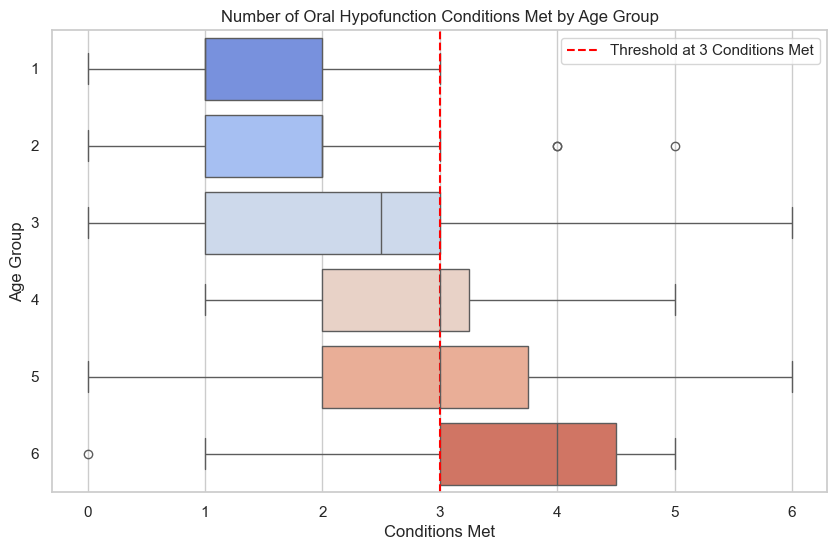

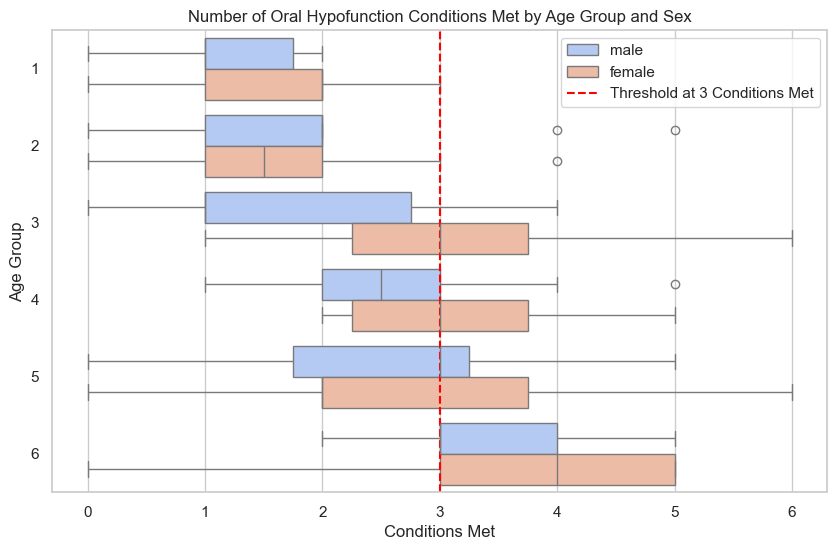

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Conditions_Met', y='Age group', orient='h', palette='coolwarm')
ax.axvline(3, color='red', linestyle='--', label='Threshold at 3 Conditions Met')
plt.title('Number of Oral Hypofunction Conditions Met by Age Group')
plt.xlabel('Conditions Met')
plt.ylabel('Age Group')
plt.legend()
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group.pdf', format='pdf', dpi=300)
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group.png', format='png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Conditions_Met', y='Age group', hue='Sex', orient='h', palette='coolwarm')
ax.axvline(3, color='red', linestyle='--', label='Threshold at 3 Conditions Met')
plt.title('Number of Oral Hypofunction Conditions Met by Age Group and Sex')
plt.xlabel('Conditions Met')
plt.ylabel('Age Group')
plt.legend()
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group_and_sex.pdf', format='pdf', dpi=300)
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group_and_sex.png', format='png', dpi=300)
plt.show()

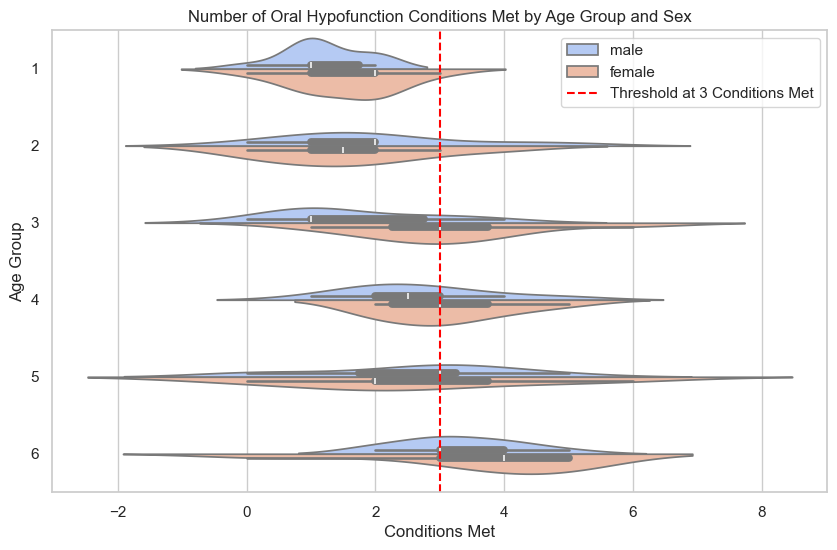

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df, x='Conditions_Met', y='Age group', hue='Sex', orient='h', split=True, palette='coolwarm')
ax.axvline(3, color='red', linestyle='--', label='Threshold at 3 Conditions Met')
plt.title('Number of Oral Hypofunction Conditions Met by Age Group and Sex')
plt.xlabel('Conditions Met')
plt.ylabel('Age Group')
plt.legend()
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group_violin.pdf', format='pdf', dpi=300)
plt.savefig('number_of_oral_hypofunction_conditions_met_by_age_group_violin.png', format='png', dpi=300)
plt.show()

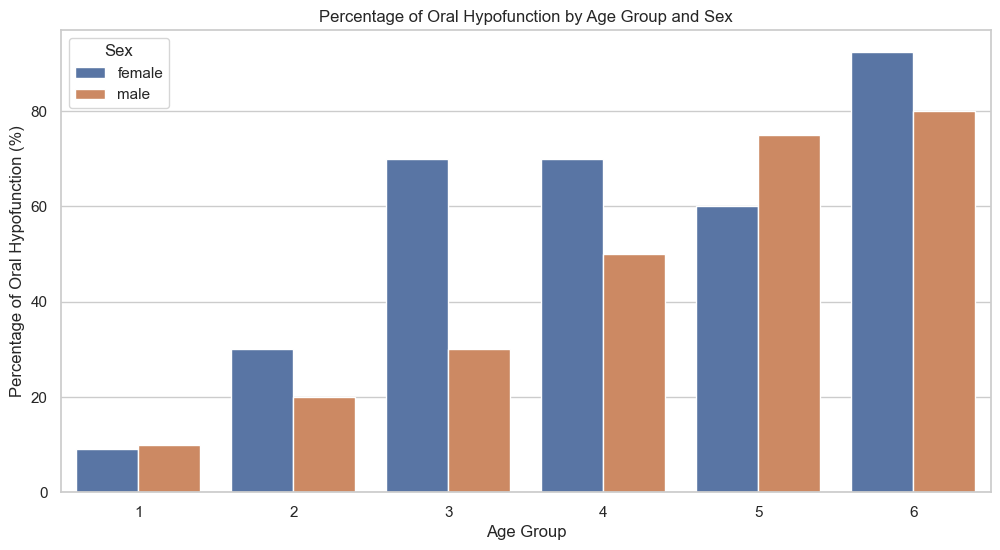

In [27]:
# Plotting the percentage of oral hypofunction by age group and sex
plt.figure(figsize=(12, 6))
sns.barplot(data=oral_hypofunction_counts, x='Age group', y='%', hue='Sex')
plt.title('Percentage of Oral Hypofunction by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Oral Hypofunction (%)')
plt.legend(title='Sex')
plt.savefig('percentage_of_oral_hypofunction_by_age_group_and_sex.pdf', format='pdf', dpi=300)
plt.savefig('percentage_of_oral_hypofunction_by_age_group_and_sex.png', format='png', dpi=300)
plt.show()


In [28]:
# Function to check oral hypofunction based on Bact_mean
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

# Function to check oral hypofunction based on Dry_mean
def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

# Function to check oral hypofunction based on Prescale
def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

# Function to check oral hypofunction based on Oral Diadochokinesis_mean
def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

# Function to check oral hypofunction based on TPressure_mean
def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

# Function to check oral hypofunction based on Glucosensor
def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

# Function to check oral hypofunction based on EAT10
def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Count failures by 'Age group' for each condition
failures_by_age_group_bact = df[df['Oral_hypofunction_bact']].groupby('Age group').size().reset_index(name='Bact_failures')
failures_by_age_group_dry = df[df['Oral_hypofunction_dry']].groupby('Age group').size().reset_index(name='Dry_failures')
failures_by_age_group_prescale = df[df['Oral_hypofunction_prescale']].groupby('Age group').size().reset_index(name='Prescale_failures')
failures_by_age_group_oral_diadochokinesis = df[df['Oral_hypofunction_oral_diadochokinesis']].groupby('Age group').size().reset_index(name='Oral_diadochokinesis_failures')
failures_by_age_group_tpressure = df[df['Oral_hypofunction_tpressure']].groupby('Age group').size().reset_index(name='TPressure_failures')
failures_by_age_group_glucosensor = df[df['Oral_hypofunction_glucosensor']].groupby('Age group').size().reset_index(name='Glucosensor_failures')
failures_by_age_group_eat10 = df[df['Oral_hypofunction_eat10']].groupby('Age group').size().reset_index(name='EAT10_failures')

# Merging all results on 'Age group'
failures_by_age_group = failures_by_age_group_bact.merge(failures_by_age_group_dry, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_prescale, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_oral_diadochokinesis, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_tpressure, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_glucosensor, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_eat10, on='Age group', how='outer')

# Fill NaN values with 0
failures_by_age_group = failures_by_age_group.fillna(0)

# Display the final aggregated results
print(failures_by_age_group)


   Age group  Bact_failures  Dry_failures  Prescale_failures  \
0          1             19             2                0.0   
1          2             18             3                1.0   
2          3             18             2                4.0   
3          4             18             4                4.0   
4          5             18             6                7.0   
5          6             21             7                6.0   

   Oral_diadochokinesis_failures  TPressure_failures  Glucosensor_failures  \
0                              4                   5                     1   
1                              8                   9                     2   
2                             13                   6                     3   
3                             13                   6                    11   
4                             15                  11                     8   
5                             20                  17                    10   

   E

In [29]:
failures_by_age_group

,Age group,Bact_failures,Dry_failures,Prescale_failures,Oral_diadochokinesis_failures,TPressure_failures,Glucosensor_failures,EAT10_failures
0,1,19,2,0.0,4,5,1,1.0
1,2,18,3,1.0,8,9,2,0.0
2,3,18,2,4.0,13,6,3,2.0
3,4,18,4,4.0,13,6,11,2.0
4,5,18,6,7.0,15,11,8,3.0
5,6,21,7,6.0,20,17,10,5.0


In [48]:
failures_by_age_group.to_excel('failures_by_age_group.xlsx')

In [50]:
# Function to check oral hypofunction based on Bact_mean
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

# Function to check oral hypofunction based on Dry_mean
def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

# Function to check oral hypofunction based on Prescale
def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

# Function to check oral hypofunction based on Oral Diadochokinesis_mean
def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

# Function to check oral hypofunction based on TPressure_mean
def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

# Function to check oral hypofunction based on Glucosensor
def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

# Function to check oral hypofunction based on EAT10
def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Count failures by 'Age group' for each condition
failures_by_age_group_bact = df[df['Oral_hypofunction_bact']].groupby('Age group').size().reset_index(name='Bact_failures')
failures_by_age_group_dry = df[df['Oral_hypofunction_dry']].groupby('Age group').size().reset_index(name='Dry_failures')
failures_by_age_group_prescale = df[df['Oral_hypofunction_prescale']].groupby('Age group').size().reset_index(name='Prescale_failures')
failures_by_age_group_oral_diadochokinesis = df[df['Oral_hypofunction_oral_diadochokinesis']].groupby('Age group').size().reset_index(name='Oral_diadochokinesis_failures')
failures_by_age_group_tpressure = df[df['Oral_hypofunction_tpressure']].groupby('Age group').size().reset_index(name='TPressure_failures')
failures_by_age_group_glucosensor = df[df['Oral_hypofunction_glucosensor']].groupby('Age group').size().reset_index(name='Glucosensor_failures')
failures_by_age_group_eat10 = df[df['Oral_hypofunction_eat10']].groupby('Age group').size().reset_index(name='EAT10_failures')

# Merging all results on 'Age group'
failures_by_age_group = failures_by_age_group_bact.merge(failures_by_age_group_dry, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_prescale, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_oral_diadochokinesis, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_tpressure, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_glucosensor, on='Age group', how='outer') \
                                                  .merge(failures_by_age_group_eat10, on='Age group', how='outer')

# Fill NaN values with 0
failures_by_age_group = failures_by_age_group.fillna(0)

# Calculate total failures for each test
total_failures = {
    'Bact_failures': failures_by_age_group['Bact_failures'].sum(),
    'Dry_failures': failures_by_age_group['Dry_failures'].sum(),
    'Prescale_failures': failures_by_age_group['Prescale_failures'].sum(),
    'Oral_diadochokinesis_failures': failures_by_age_group['Oral_diadochokinesis_failures'].sum(),
    'TPressure_failures': failures_by_age_group['TPressure_failures'].sum(),
    'Glucosensor_failures': failures_by_age_group['Glucosensor_failures'].sum(),
    'EAT10_failures': failures_by_age_group['EAT10_failures'].sum()
}

# Sort the total failures in descending order
sorted_failures = sorted(total_failures.items(), key=lambda x: x[1], reverse=True)

# Display the sorted failures
for test, count in sorted_failures:
    print(f"{test}: {count}")

# Optionally, you can convert this to a DataFrame for a cleaner display
failures_df = pd.DataFrame(sorted_failures, columns=['Test', 'Total Failures'])
print(failures_df)


KeyError: 'Bacteria'

In [51]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assume df is your existing DataFrame with necessary columns

# Create a new column to indicate if any oral hypofunction condition failed
df['Any_Failure'] = df[[condition for condition in conditions.keys()]].any(axis=1)

# Perform ANOVA test for each condition
anova_results = {}
for condition in conditions.keys():
    formula = f'{condition} ~ C(Any_Failure)'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"][0]
    anova_results[condition] = p_value

# Print the p-values
for condition, p_value in anova_results.items():
    print(f"P-value for {condition}: {p_value}")


AttributeError: 'list' object has no attribute 'keys'

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assume df is your existing DataFrame with necessary columns

# Define the conditions and the corresponding parameters
conditions_parameters = {
    'Oral_hypofunction_bact': 'Bacteria',
    'Oral_hypofunction_dry': 'Dryness',
    'Oral_hypofunction_prescale': 'Prescale',
    'Oral_hypofunction_oral_diadochokinesis': 'ODK',
    'Oral_hypofunction_tpressure': 'TonguePressure',
    'Oral_hypofunction_glucosensor': 'Glucosensor',
    'Oral_hypofunction_eat10': 'EAT10'
}

# Apply the conditions row-wise to create indicators for each condition
for condition, func in conditions.items():
    df[condition] = df.apply(func, axis=1)

# Perform ANOVA test for each condition
anova_results = {}
for condition, parameter in conditions_parameters.items():
    formula = f'{parameter} ~ C({condition})'
    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table["PR(>F)"][0]
    anova_results[condition] = p_value

# Print the p-values
for condition, p_value in anova_results.items():
    print(f"P-value for {condition}: {p_value}")

# Optionally, you can convert this to a DataFrame for a cleaner display
anova_df = pd.DataFrame(list(anova_results.items()), columns=['Condition', 'P-value'])
print(anova_df)


AttributeError: 'list' object has no attribute 'items'

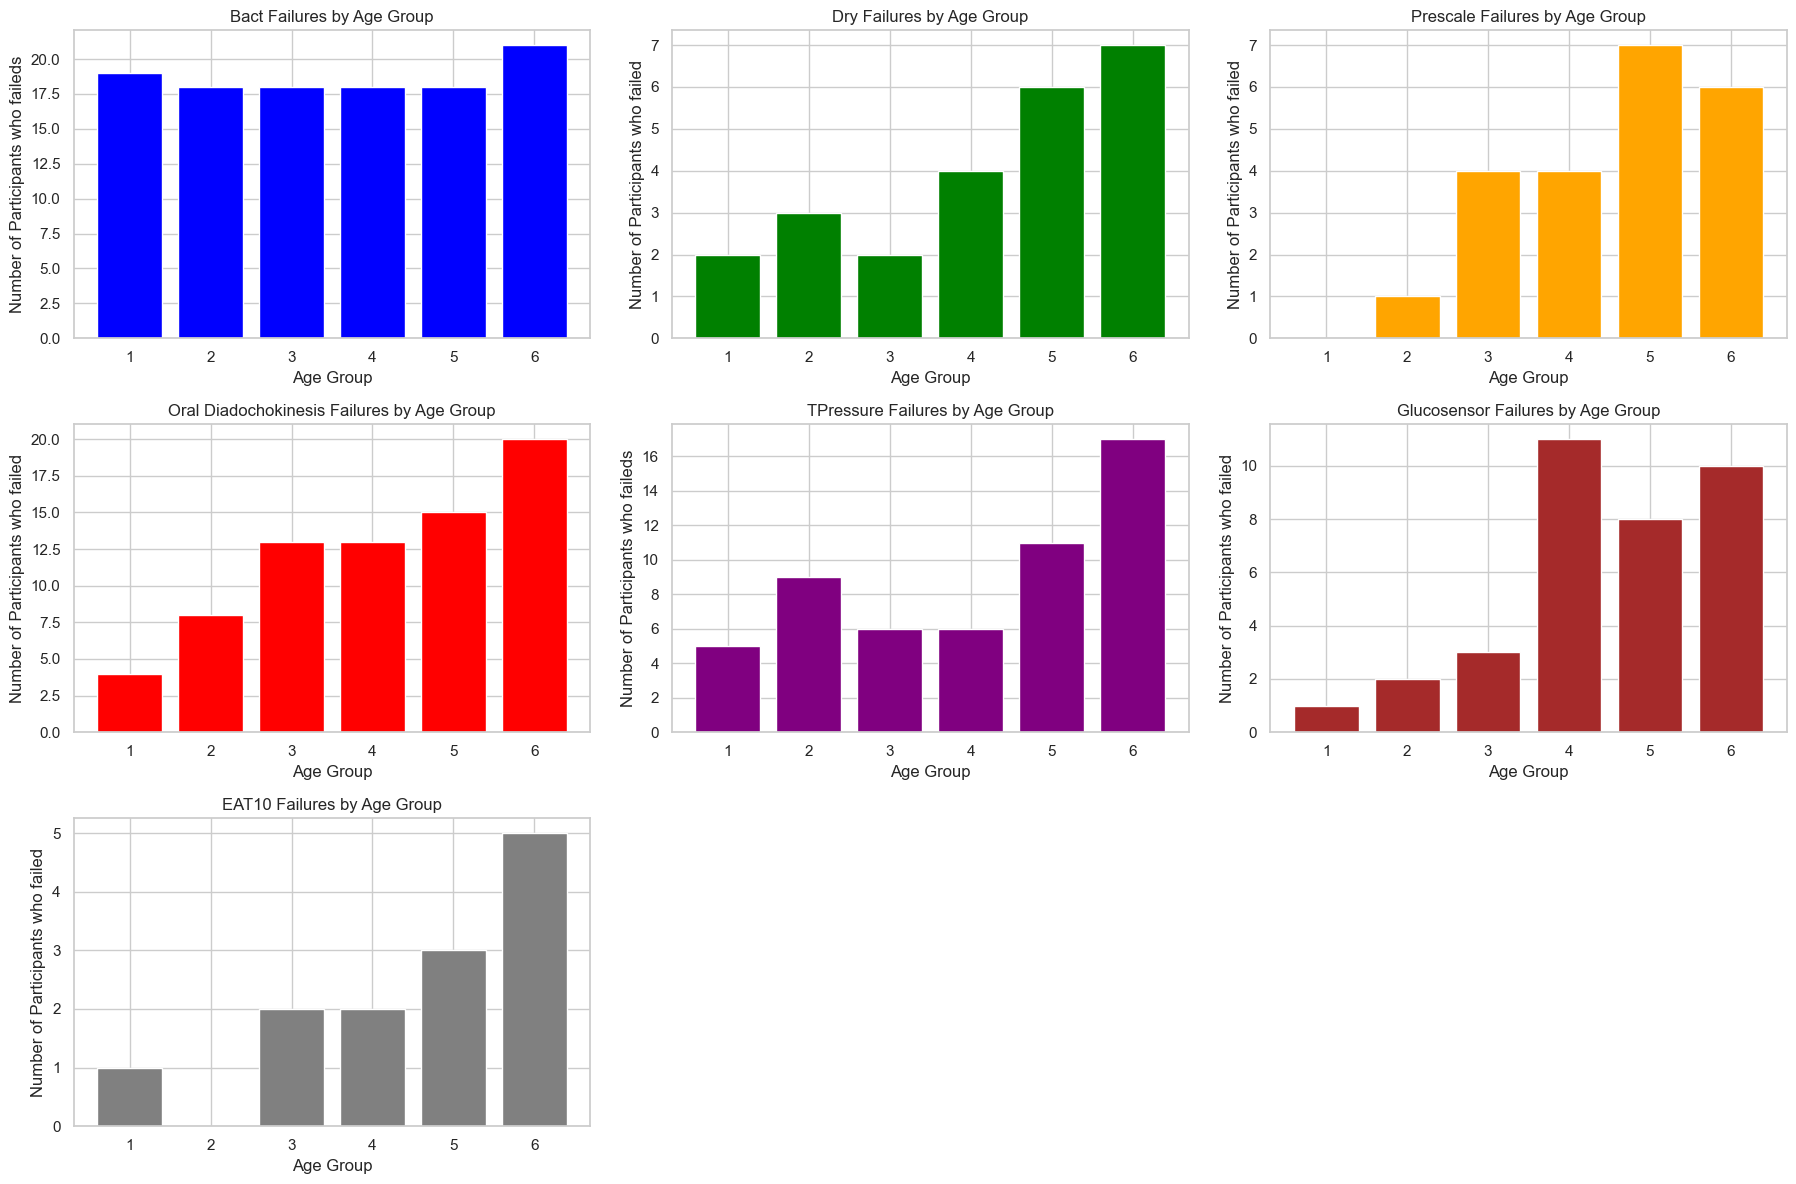

In [32]:
import matplotlib.pyplot as plt

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Plotting Bact failures
axes[0, 0].bar(failures_by_age_group['Age group'], failures_by_age_group['Bact_failures'], color='blue')
axes[0, 0].set_title('Bact Failures by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Number of Participants who faileds')

# Plotting Oral Diadochokinesis failures
axes[1, 0].bar(failures_by_age_group['Age group'], failures_by_age_group['Oral_diadochokinesis_failures'], color='red')
axes[1, 0].set_title('Oral Diadochokinesis Failures by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Number of Participants who failed')

# Plotting TPressure failures
axes[1, 1].bar(failures_by_age_group['Age group'], failures_by_age_group['TPressure_failures'], color='purple')
axes[1, 1].set_title('TPressure Failures by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Number of Participants who faileds')

# Plotting Glucosensor failures
axes[1, 2].bar(failures_by_age_group['Age group'], failures_by_age_group['Glucosensor_failures'], color='brown')
axes[1, 2].set_title('Glucosensor Failures by Age Group')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('Number of Participants who failed')

# Plotting Dry failures
axes[0, 1].bar(failures_by_age_group['Age group'], failures_by_age_group['Dry_failures'], color='green')
axes[0, 1].set_title('Dry Failures by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Number of Participants who failed')

# Plotting Prescale failures
axes[0, 2].bar(failures_by_age_group['Age group'], failures_by_age_group['Prescale_failures'], color='orange')
axes[0, 2].set_title('Prescale Failures by Age Group')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Number of Participants who failed')


# Plotting EAT10 failures
axes[2, 0].bar(failures_by_age_group['Age group'], failures_by_age_group['EAT10_failures'], color='gray')
axes[2, 0].set_title('EAT10 Failures by Age Group')
axes[2, 0].set_xlabel('Age Group')
axes[2, 0].set_ylabel('Number of Participants who failed')

# Hide the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('Failure_by_Age_group.pdf', format='pdf', dpi=300)
plt.savefig('Failure_by_Age_group.png', format='png', dpi=300)
# Show plot
plt.show()


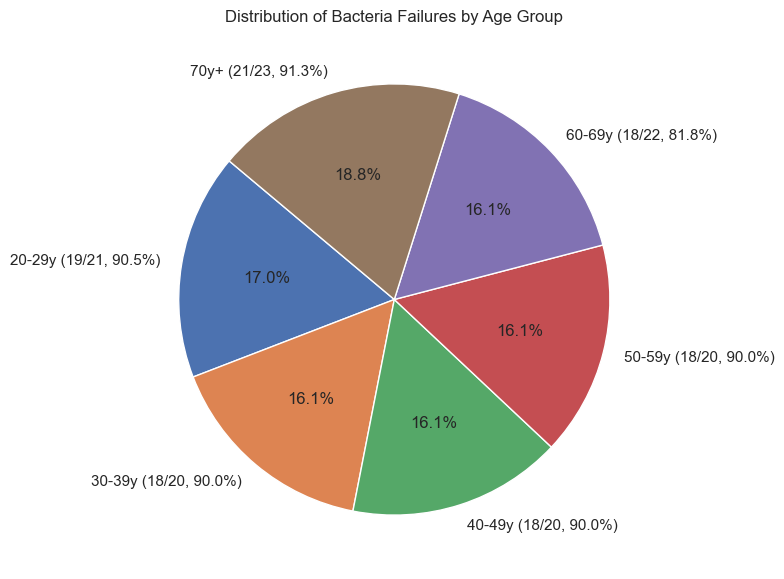

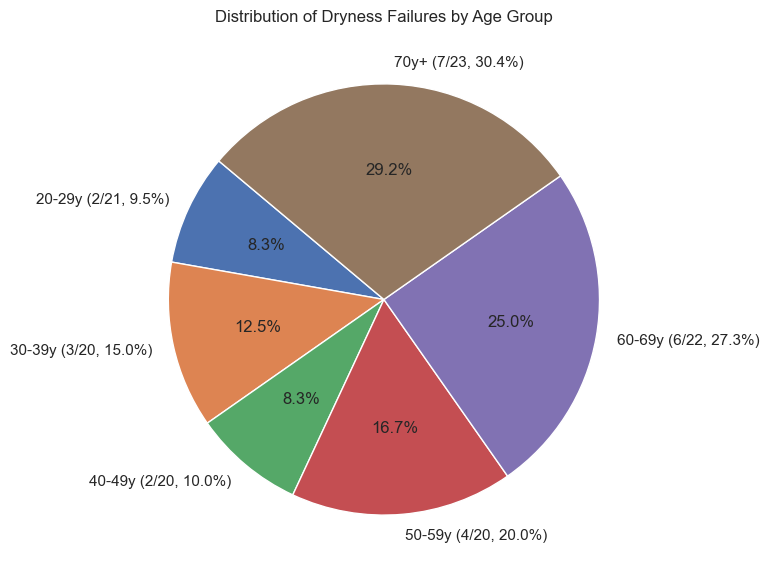

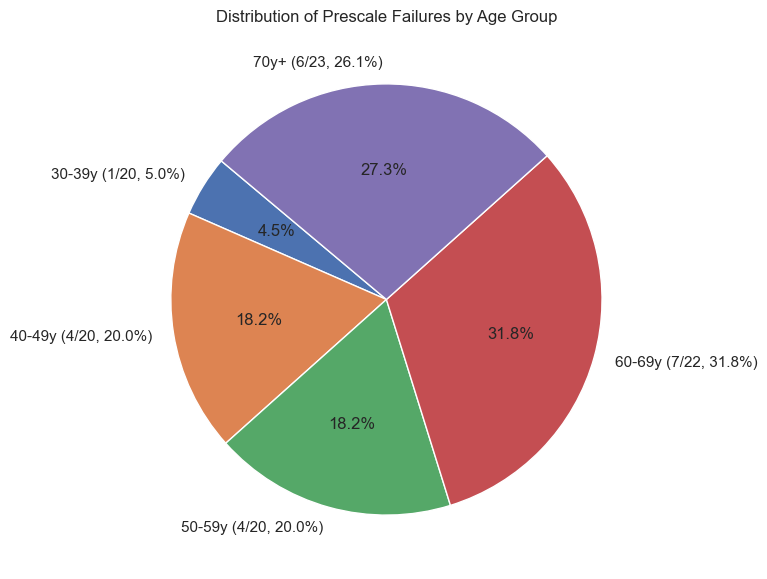

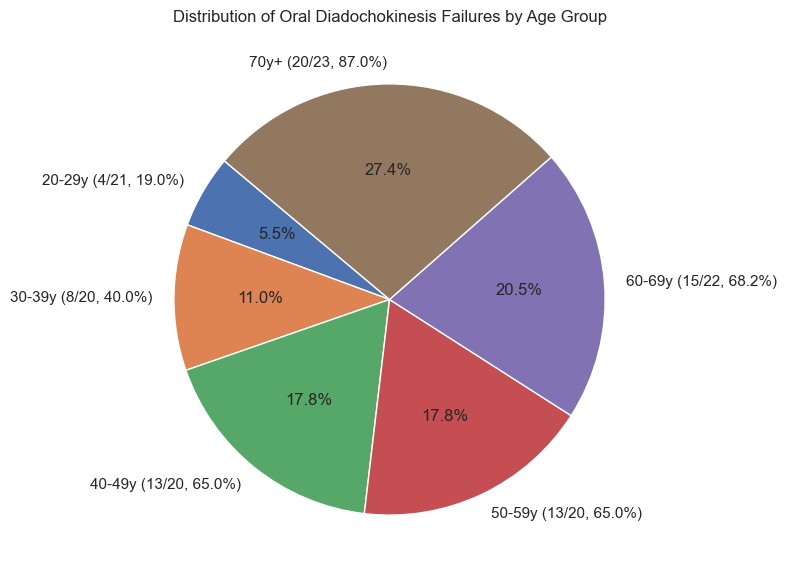

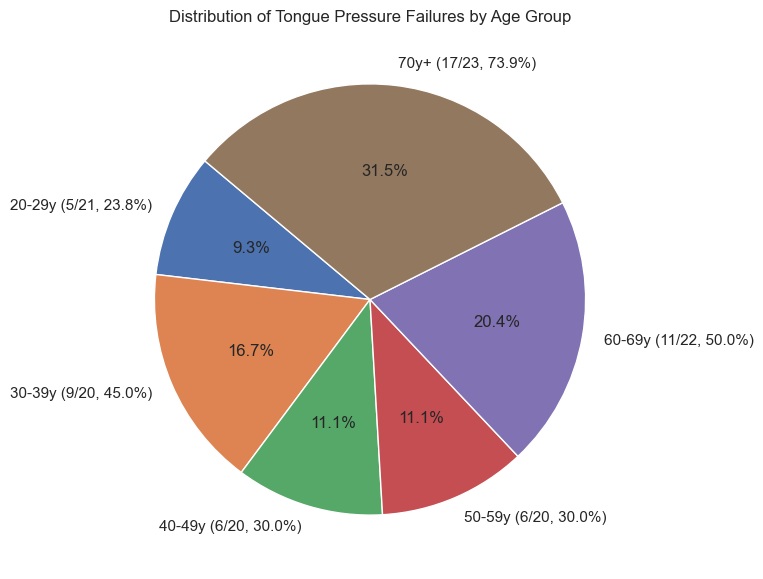

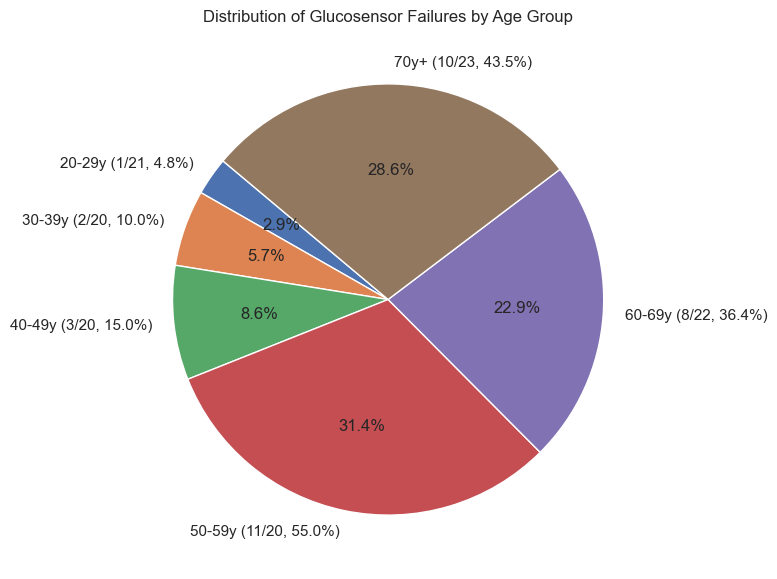

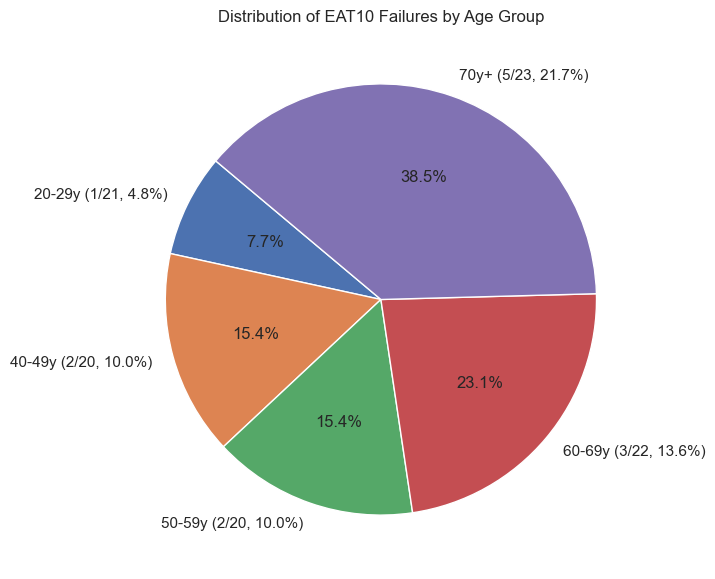

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Prescale', 'Glucosensor', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Function to check oral hypofunction based on different parameters
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Function to plot pie charts for each test and save them
def plot_and_save_pie_chart(df, column, title, filename):
    failures_by_age_group = df[df[column]].groupby('Age group').size().reset_index(name='Failures')
    
    # Total number of participants in each age group
    total_by_age_group = df.groupby('Age group').size().reset_index(name='Total')
    
    # Merge failures and total counts
    merged_data = pd.merge(failures_by_age_group, total_by_age_group, on='Age group')
    
    # Calculate percentages
    merged_data['Percentage'] = (merged_data['Failures'] / merged_data['Total']) * 100
    
    # Define labels
    labels = [f"{age_group} ({failures}/{total}, {percentage:.1f}%)" 
              for age_group, failures, total, percentage in zip(merged_data['Age group'], 
                                                               merged_data['Failures'], 
                                                               merged_data['Total'], 
                                                               merged_data['Percentage'])]
    
    plt.figure(figsize=(10, 7))
    plt.pie(merged_data['Failures'], labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

# Plot and save pie charts for all the tests
plot_and_save_pie_chart(df, 'Oral_hypofunction_bact', 'Distribution of Bacteria Failures by Age Group', 'bacteria_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_dry', 'Distribution of Dryness Failures by Age Group', 'dryness_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_prescale', 'Distribution of Prescale Failures by Age Group', 'prescale_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_oral_diadochokinesis', 'Distribution of Oral Diadochokinesis Failures by Age Group', 'oral_diadochokinesis_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_tpressure', 'Distribution of Tongue Pressure Failures by Age Group', 'tongue_pressure_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_glucosensor', 'Distribution of Glucosensor Failures by Age Group', 'glucosensor_failures.png')
plot_and_save_pie_chart(df, 'Oral_hypofunction_eat10', 'Distribution of EAT10 Failures by Age Group', 'eat10_failures.png')


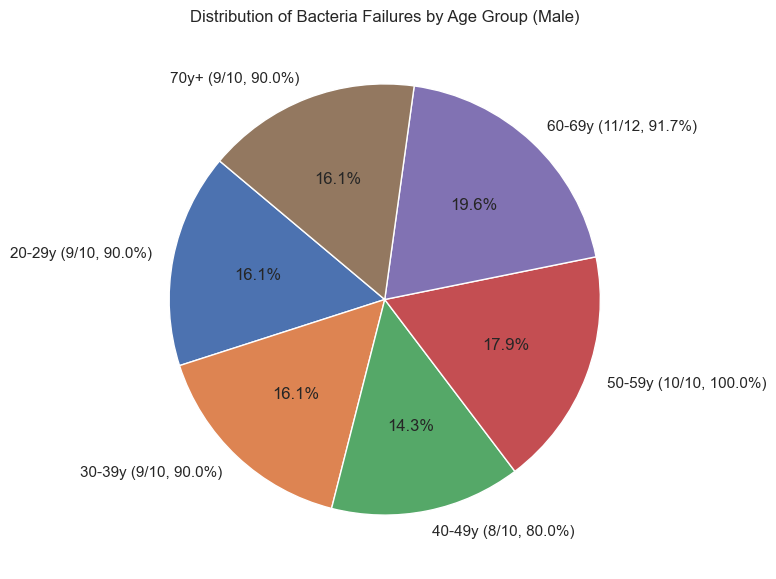

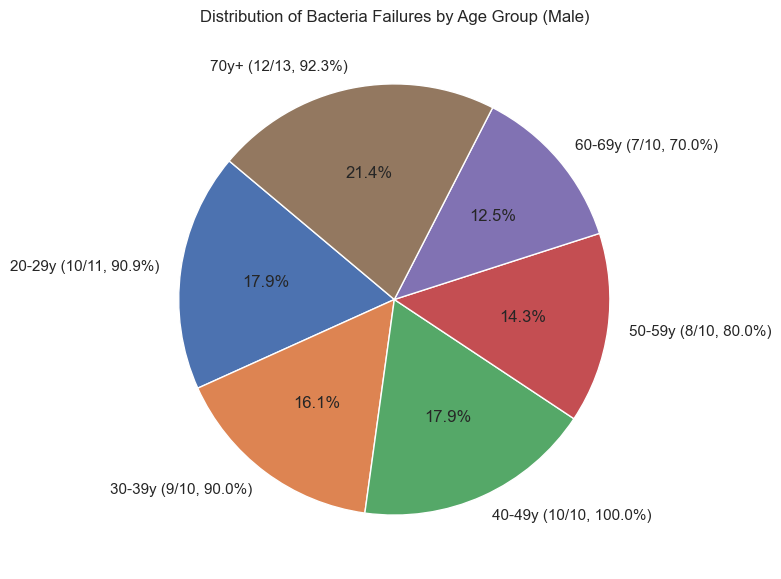

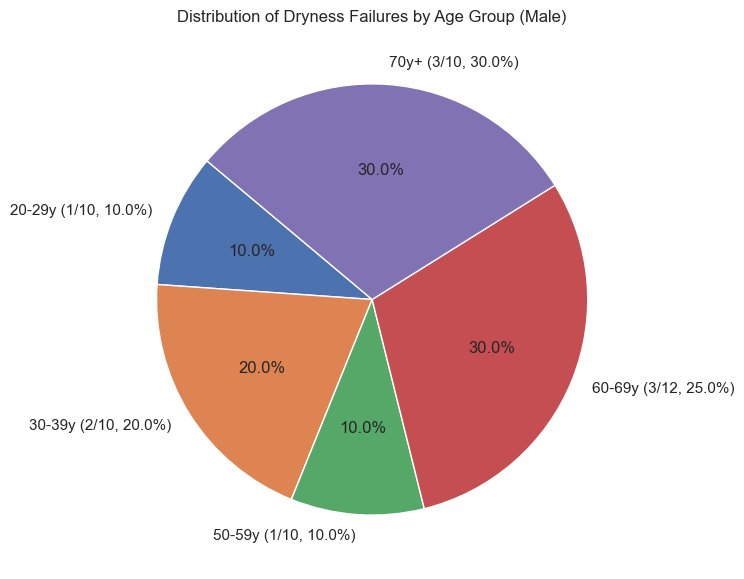

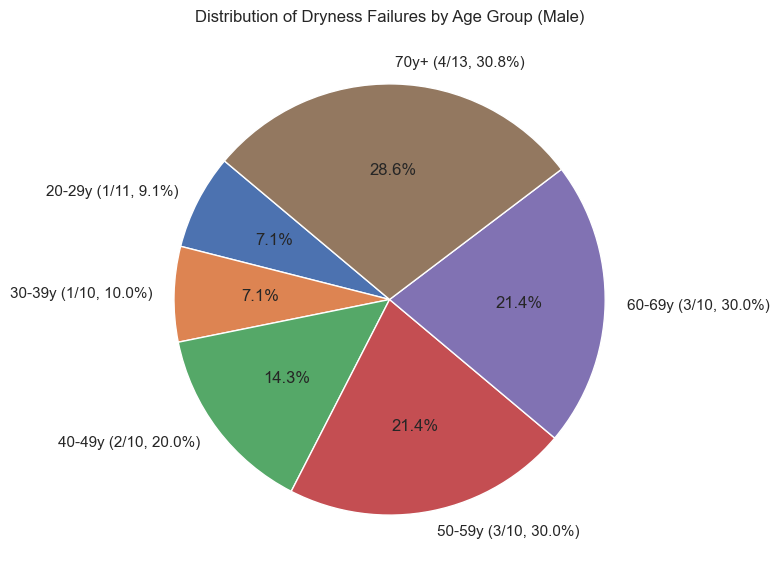

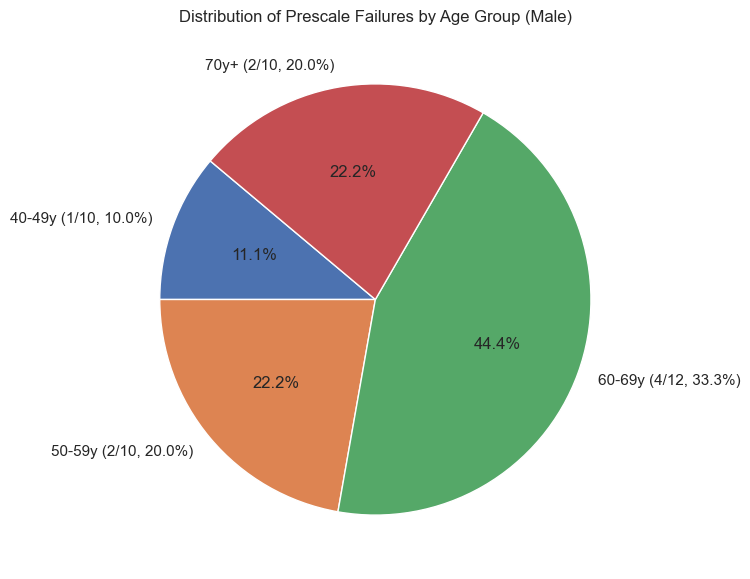

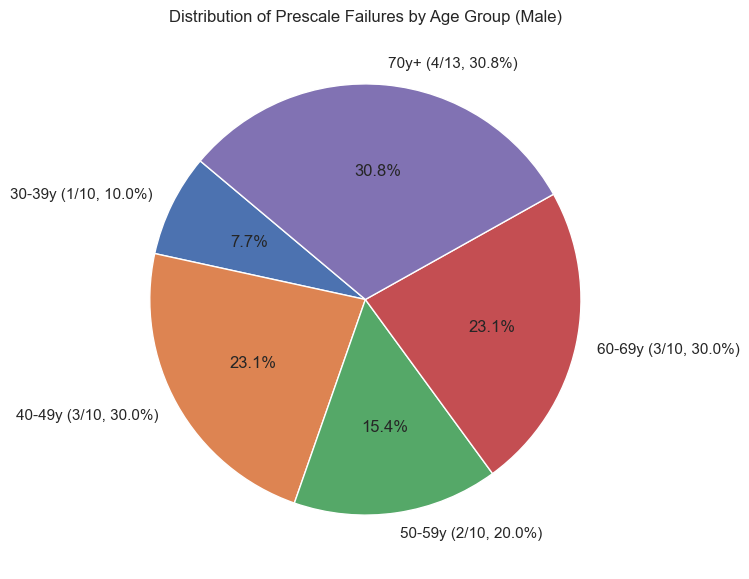

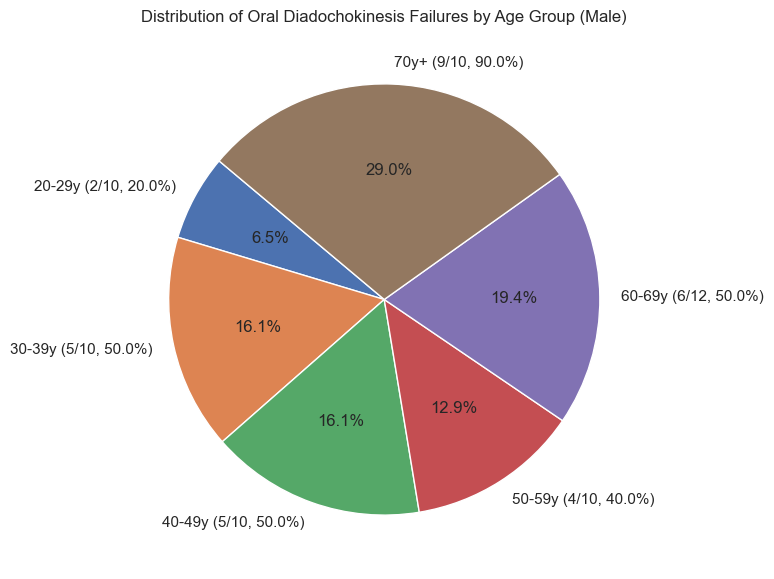

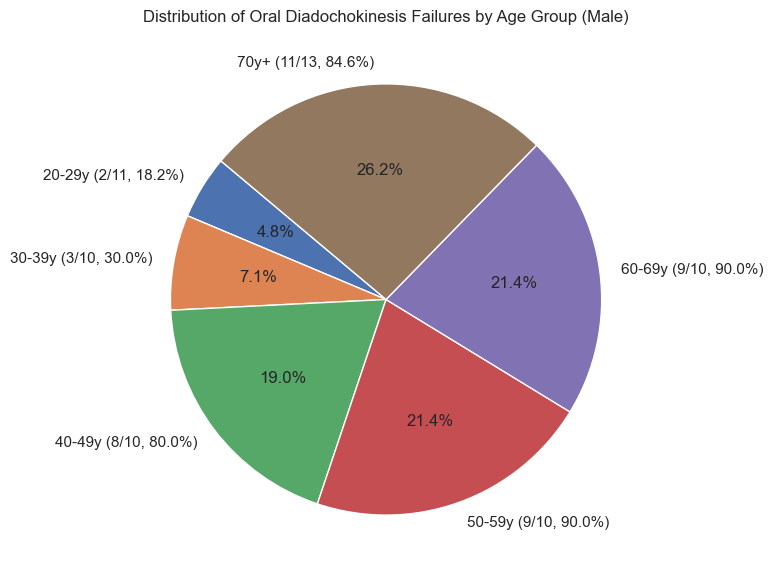

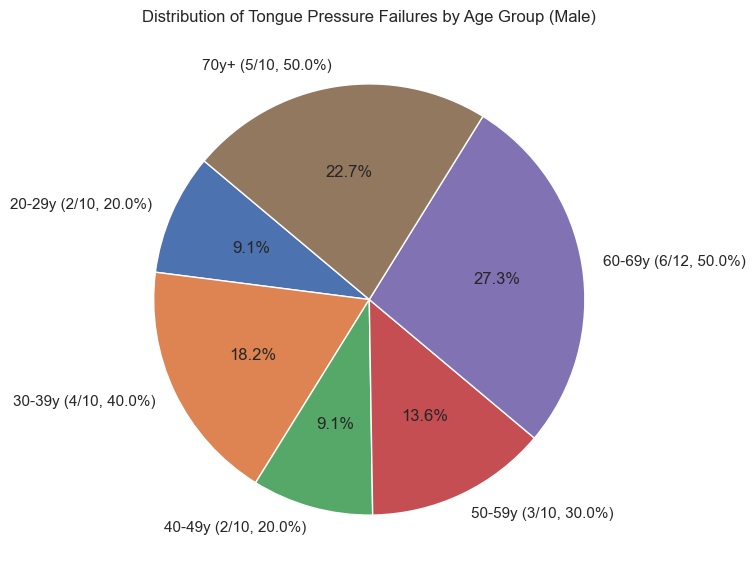

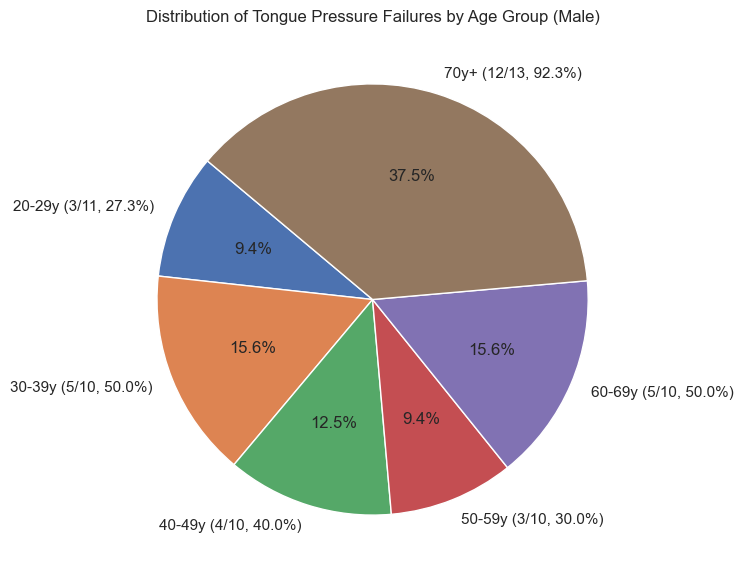

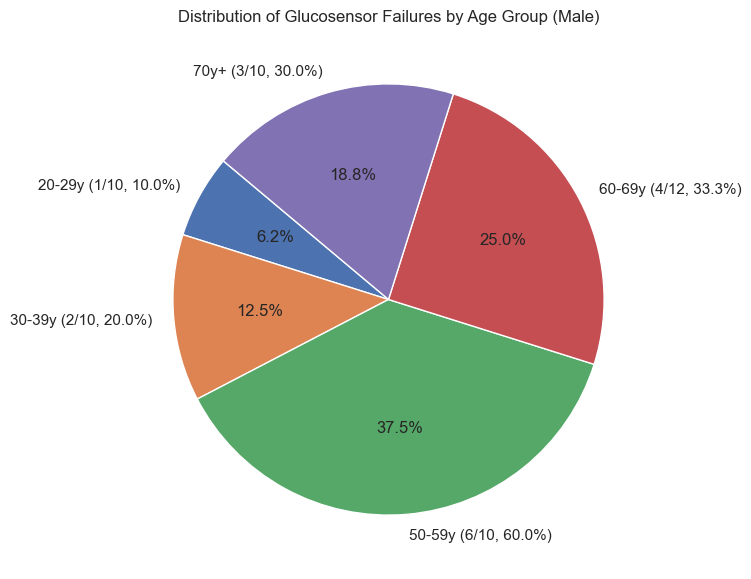

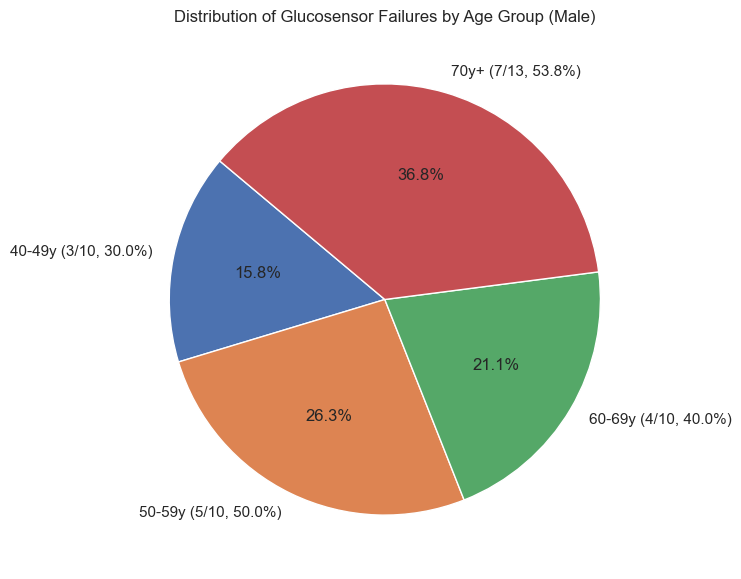

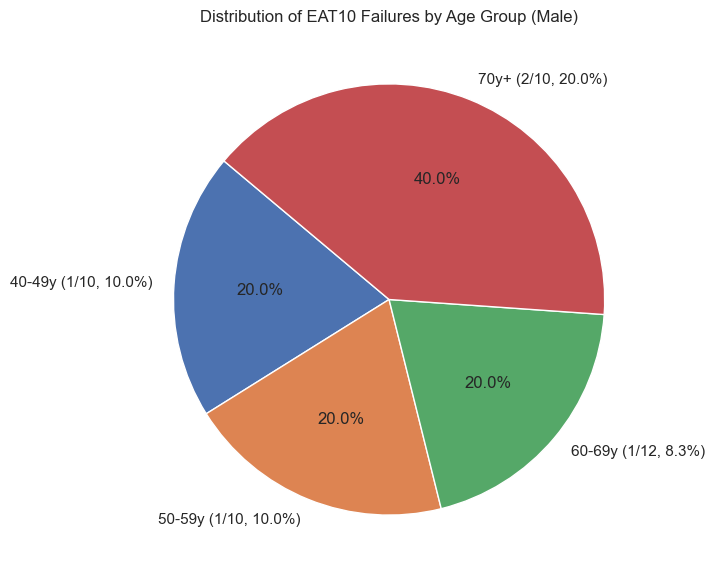

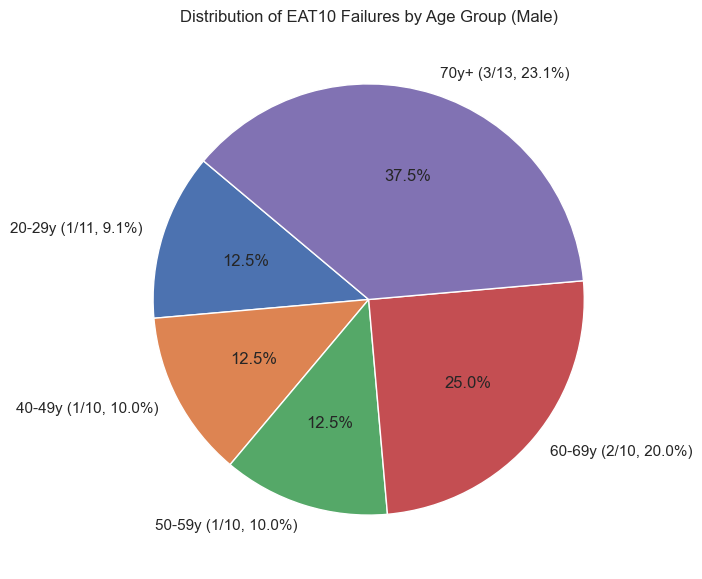

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("Oral Hypofunction_final.xlsx", skiprows=2)

# Map the 'Age group' in the dataframe
age_group_mapping = {
    1: '20-29y',
    2: '30-39y',
    3: '40-49y',
    4: '50-59y',
    5: '60-69y',
    6: '70y+'
}
df['Age group'] = df['Age group'].map(age_group_mapping)

# Calculate mean for the specified columns
df['Bacteria'] = df[['Bact1', 'Bact2', 'Bact3']].mean(axis=1, numeric_only=True)
df['Dryness'] = df[['Dry1', 'Dry2', 'Dry3']].mean(axis=1, numeric_only=True)
df['TonguePressure'] = df[['TP1', 'TP2', 'TP3']].mean(axis=1, numeric_only=True)
df['RightGrip'] = df[['RG1', 'RG2', 'RG3']].mean(axis=1, numeric_only=True)
df['LeftGrip'] = df[['LG1', 'LG2', 'LG3']].mean(axis=1, numeric_only=True)

# Ensure numeric columns are numeric
numeric_columns = ['Prescale', 'Glucosensor', 'TonguePressure', 'RightGrip', 'LeftGrip', 'ODK']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Function to check oral hypofunction based on different parameters
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Function to plot pie charts for each test and save them, aggregated by age group and sex
def plot_and_save_pie_chart(df, column, title, filename):
    for sex in df['Sex'].unique():
        sex_label = 'Female' if sex == 1 else 'Male'
        subset = df[df['Sex'] == sex]
        failures_by_age_group = subset[subset[column]].groupby('Age group').size().reset_index(name='Failures')

        # Total number of participants in each age group
        total_by_age_group = subset.groupby('Age group').size().reset_index(name='Total')

        # Merge failures and total counts
        merged_data = pd.merge(failures_by_age_group, total_by_age_group, on='Age group')

        # Calculate percentages
        merged_data['Percentage'] = (merged_data['Failures'] / merged_data['Total']) * 100

        # Define labels
        labels = [f"{age_group} ({failures}/{total}, {percentage:.1f}%)" 
                  for age_group, failures, total, percentage in zip(merged_data['Age group'], 
                                                                   merged_data['Failures'], 
                                                                   merged_data['Total'], 
                                                                   merged_data['Percentage'])]

        plt.figure(figsize=(10, 7))
        plt.pie(merged_data['Failures'], labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f"{title} ({sex_label})")
        plt.savefig(f"{filename}_{sex_label}.png")
        plt.show()

# Plot and save pie charts for all the tests, aggregated by age group and sex
plot_and_save_pie_chart(df, 'Oral_hypofunction_bact', 'Distribution of Bacteria Failures by Age Group', 'bacteria_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_dry', 'Distribution of Dryness Failures by Age Group', 'dryness_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_prescale', 'Distribution of Prescale Failures by Age Group', 'prescale_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_oral_diadochokinesis', 'Distribution of Oral Diadochokinesis Failures by Age Group', 'oral_diadochokinesis_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_tpressure', 'Distribution of Tongue Pressure Failures by Age Group', 'tongue_pressure_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_glucosensor', 'Distribution of Glucosensor Failures by Age Group', 'glucosensor_failures')
plot_and_save_pie_chart(df, 'Oral_hypofunction_eat10', 'Distribution of EAT10 Failures by Age Group', 'eat10_failures')


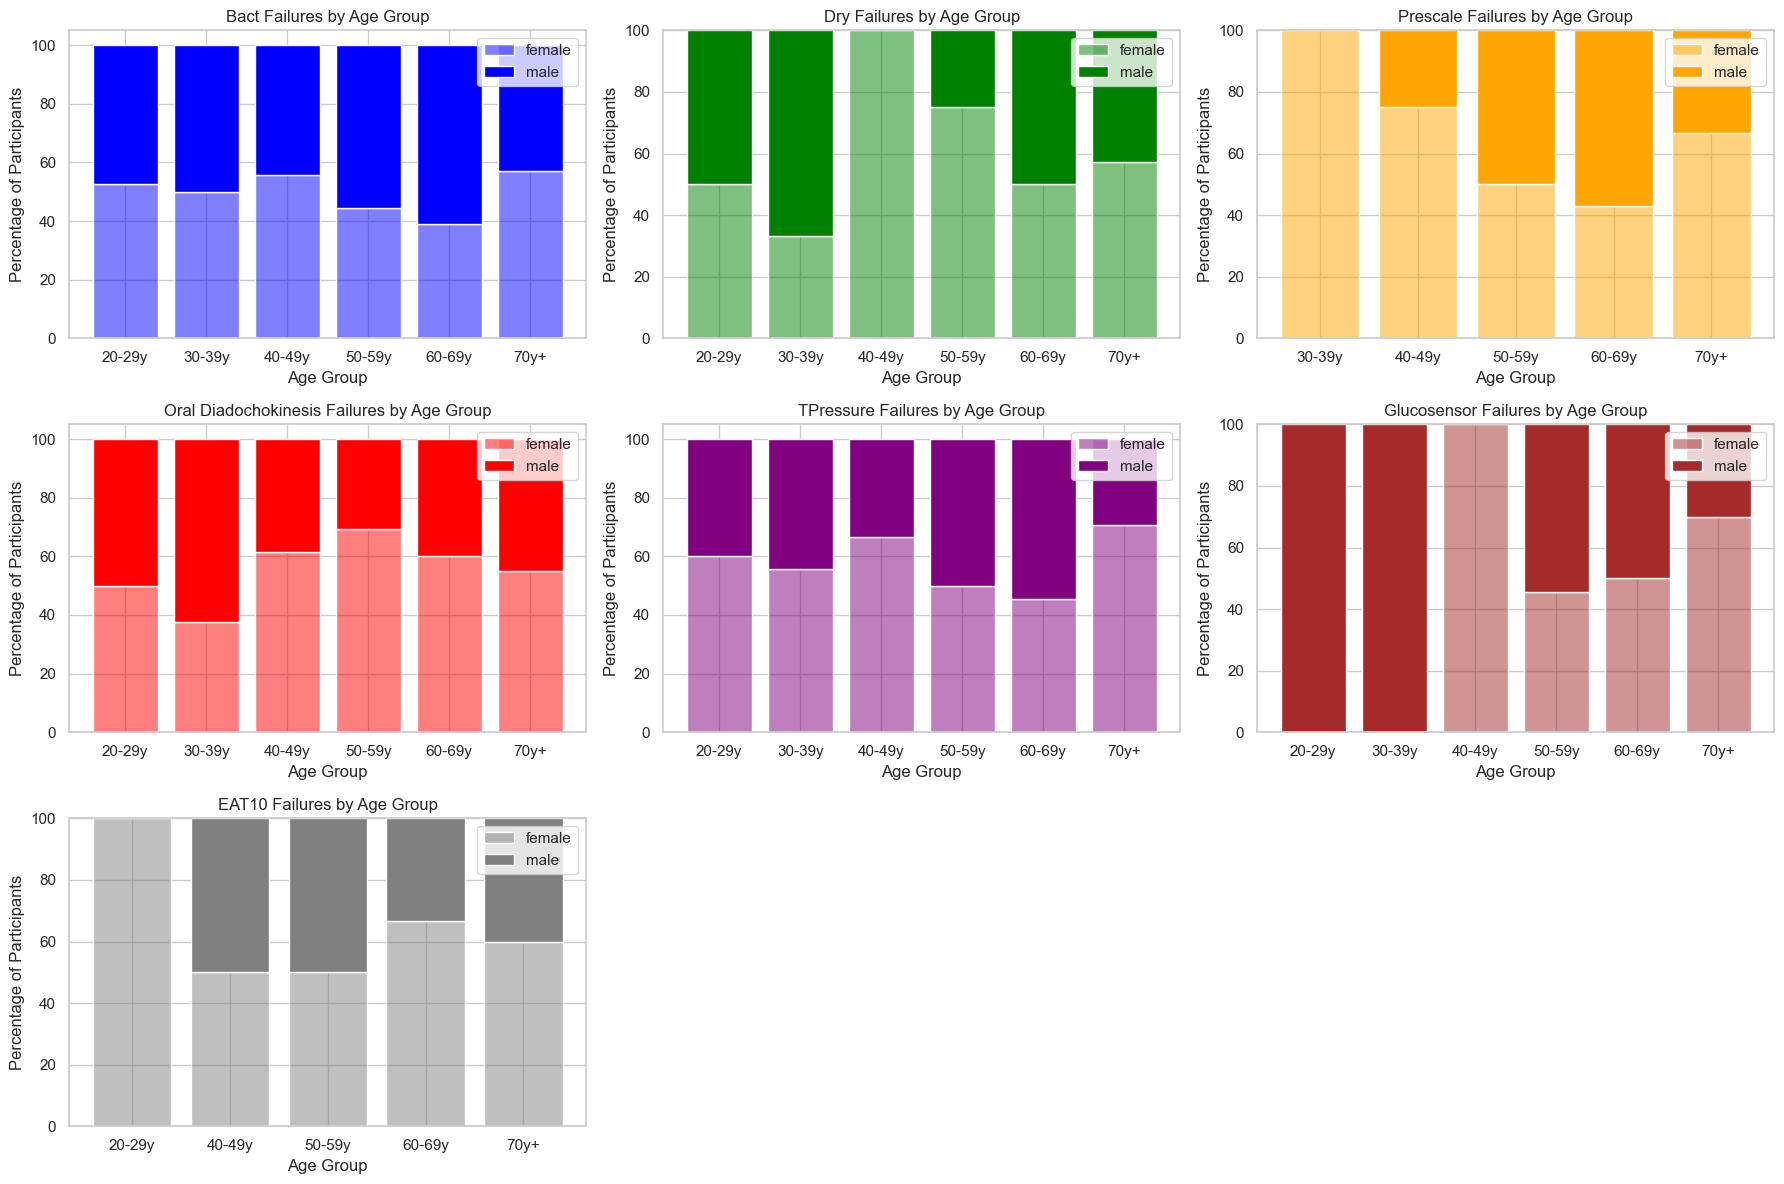

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Define functions to check oral hypofunction
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Helper function to calculate the percentage of failures by sex
def calculate_sex_percentage(failures_df, condition_col):
    sex_distribution = failures_df.groupby(['Age group', 'Sex']).size().unstack(fill_value=0).reset_index()
    sex_distribution.columns.name = None  # Remove the name of the index column
    sex_distribution['Total_failures'] = sex_distribution['female'] + sex_distribution['male']
    sex_distribution['Female_percentage'] = (sex_distribution['female'] / sex_distribution['Total_failures']) * 100
    sex_distribution['Male_percentage'] = (sex_distribution['male'] / sex_distribution['Total_failures']) * 100
    return sex_distribution

# Calculate the distribution of failures by age group and sex for each condition
failures_by_age_group_bact = calculate_sex_percentage(df[df['Oral_hypofunction_bact']], 'Oral_hypofunction_bact')
failures_by_age_group_dry = calculate_sex_percentage(df[df['Oral_hypofunction_dry']], 'Oral_hypofunction_dry')
failures_by_age_group_prescale = calculate_sex_percentage(df[df['Oral_hypofunction_prescale']], 'Oral_hypofunction_prescale')
failures_by_age_group_oral_diadochokinesis = calculate_sex_percentage(df[df['Oral_hypofunction_oral_diadochokinesis']], 'Oral_hypofunction_oral_diadochokinesis')
failures_by_age_group_tpressure = calculate_sex_percentage(df[df['Oral_hypofunction_tpressure']], 'Oral_hypofunction_tpressure')
failures_by_age_group_glucosensor = calculate_sex_percentage(df[df['Oral_hypofunction_glucosensor']], 'Oral_hypofunction_glucosensor')
failures_by_age_group_eat10 = calculate_sex_percentage(df[df['Oral_hypofunction_eat10']], 'Oral_hypofunction_eat10')

# Define a plotting function with different gradients for male and female
def plot_failures(axes, row, col, data, condition, color):
    female_color = color + "80"  # Light shade
    male_color = color  # Original color
    axes[row, col].bar(data['Age group'], data['Female_percentage'], color=female_color, label='female')
    axes[row, col].bar(data['Age group'], data['Male_percentage'], bottom=data['Female_percentage'], color=male_color, label='male')
    axes[row, col].set_title(f'{condition} Failures by Age Group')
    axes[row, col].set_xlabel('Age Group')
    axes[row, col].set_ylabel('Percentage of Participants')
    axes[row, col].legend()

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

plot_failures(axes, 0, 0, failures_by_age_group_bact, 'Bact', '#0000FF')  # Blue
plot_failures(axes, 0, 1, failures_by_age_group_dry, 'Dry', '#008000')  # Green
plot_failures(axes, 0, 2, failures_by_age_group_prescale, 'Prescale', '#FFA500')  # Orange
plot_failures(axes, 1, 0, failures_by_age_group_oral_diadochokinesis, 'Oral Diadochokinesis', '#FF0000')  # Red
plot_failures(axes, 1, 1, failures_by_age_group_tpressure, 'TPressure', '#800080')  # Purple
plot_failures(axes, 1, 2, failures_by_age_group_glucosensor, 'Glucosensor', '#A52A2A')  # Brown
plot_failures(axes, 2, 0, failures_by_age_group_eat10, 'EAT10', '#808080')  # Gray

# Hide the empty subplot
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('Failure_by_Age_group.pdf', format='pdf', dpi=300)
plt.savefig('Failure_by_Age_group.png', format='png', dpi=300)
# Show plot
plt.show()


Sex Age group  female_bact  male_bact  female_dry  male_dry  female_prescale  \
0      20-29y           10          9           1         1              0.0   
1      30-39y            9          9           1         2              1.0   
2      40-49y           10          8           2         0              3.0   
3      50-59y            8         10           3         1              2.0   
4      60-69y            7         11           3         3              3.0   
5        70y+           12          9           4         3              4.0   

Sex  male_prescale  female_oral_diadochokinesis  male_oral_diadochokinesis  \
0              0.0                            2                          2   
1              0.0                            3                          5   
2              1.0                            8                          5   
3              2.0                            9                          4   
4              4.0                            9  

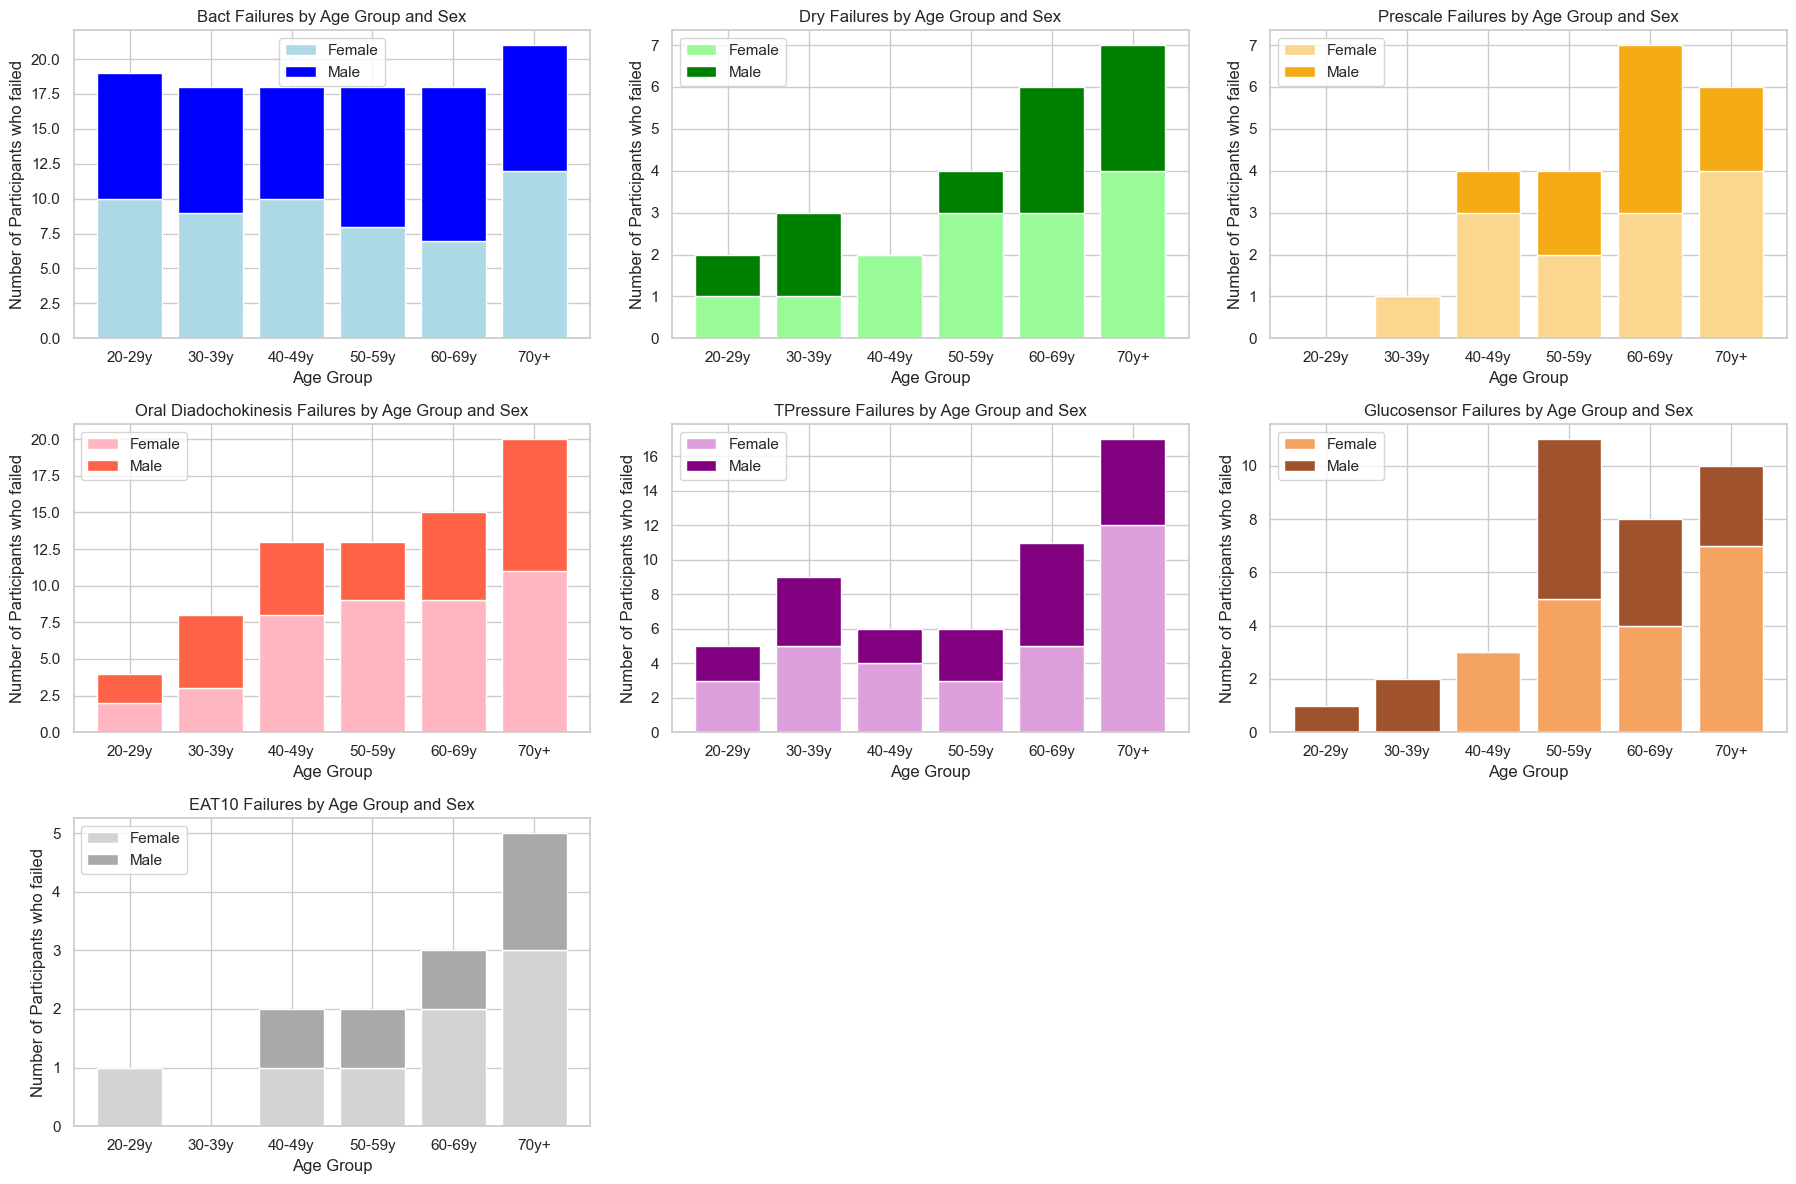

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the main function to check oral hypofunction
def check_oral_hypofunction(row):
    try:
        bact_mean = float(row['Bacteria'])
        dry_mean = float(row['Dryness'])
        prescale = float(row['Prescale'])
        pataka_mean = float(row['ODK'])
        tpressure_mean = float(row['TonguePressure'])
        glucosensor = float(row['Glucosensor'])
        eat10 = float(row['EAT10'])
    except (ValueError, TypeError):
        return 0

    conditions = [
        bact_mean >= 2,
        dry_mean < 27,
        prescale < 200,
        pataka_mean < 6,
        tpressure_mean < 30,
        glucosensor < 100,
        eat10 >= 3
    ]
    return sum(conditions)

# Apply the main function row-wise to create a new column 'Conditions_Met'
df['Conditions_Met'] = df.apply(check_oral_hypofunction, axis=1)

# Define individual functions to check each condition
def check_oral_hypofunction_bact(row):
    return row['Bacteria'] >= 2

def check_oral_hypofunction_dry(row):
    return row['Dryness'] < 27

def check_oral_hypofunction_prescale(row):
    return row['Prescale'] < 200

def check_oral_hypofunction_oral_diadochokinesis(row):
    return row['ODK'] < 6

def check_oral_hypofunction_tpressure(row):
    return row['TonguePressure'] < 30

def check_oral_hypofunction_glucosensor(row):
    return row['Glucosensor'] < 100

def check_oral_hypofunction_eat10(row):
    return row['EAT10'] >= 3

# Apply the individual functions row-wise to create indicators for each condition
df['Oral_hypofunction_bact'] = df.apply(check_oral_hypofunction_bact, axis=1)
df['Oral_hypofunction_dry'] = df.apply(check_oral_hypofunction_dry, axis=1)
df['Oral_hypofunction_prescale'] = df.apply(check_oral_hypofunction_prescale, axis=1)
df['Oral_hypofunction_oral_diadochokinesis'] = df.apply(check_oral_hypofunction_oral_diadochokinesis, axis=1)
df['Oral_hypofunction_tpressure'] = df.apply(check_oral_hypofunction_tpressure, axis=1)
df['Oral_hypofunction_glucosensor'] = df.apply(check_oral_hypofunction_glucosensor, axis=1)
df['Oral_hypofunction_eat10'] = df.apply(check_oral_hypofunction_eat10, axis=1)

# Count failures by 'Age group' and 'Sex' for each condition
def count_failures(df, condition_col):
    return df[df[condition_col]].groupby(['Age group', 'Sex']).size().unstack(fill_value=0).reset_index()

failures_by_age_sex_bact = count_failures(df, 'Oral_hypofunction_bact').rename(columns={'female': 'female_bact', 'male': 'male_bact'})
failures_by_age_sex_oral_diadochokinesis = count_failures(df, 'Oral_hypofunction_oral_diadochokinesis').rename(columns={'female': 'female_oral_diadochokinesis', 'male': 'male_oral_diadochokinesis'})
failures_by_age_sex_tpressure = count_failures(df, 'Oral_hypofunction_tpressure').rename(columns={'female': 'female_tpressure', 'male': 'male_tpressure'})
failures_by_age_sex_glucosensor = count_failures(df, 'Oral_hypofunction_glucosensor').rename(columns={'female': 'female_glucosensor', 'male': 'male_glucosensor'})
failures_by_age_sex_dry = count_failures(df, 'Oral_hypofunction_dry').rename(columns={'female': 'female_dry', 'male': 'male_dry'})
failures_by_age_sex_prescale = count_failures(df, 'Oral_hypofunction_prescale').rename(columns={'female': 'female_prescale', 'male': 'male_prescale'})
failures_by_age_sex_eat10 = count_failures(df, 'Oral_hypofunction_eat10').rename(columns={'female': 'female_eat10', 'male': 'male_eat10'})

# Merge all results on 'Age group'
failures_by_age_sex = failures_by_age_sex_bact.merge(failures_by_age_sex_dry, on='Age group', how='outer') \
                                              .merge(failures_by_age_sex_prescale, on='Age group', how='outer') \
                                              .merge(failures_by_age_sex_oral_diadochokinesis, on='Age group', how='outer') \
                                              .merge(failures_by_age_sex_tpressure, on='Age group', how='outer') \
                                              .merge(failures_by_age_sex_glucosensor, on='Age group', how='outer') \
                                              .merge(failures_by_age_sex_eat10, on='Age group', how='outer')

# Fill NaN values with 0
failures_by_age_sex = failures_by_age_sex.fillna(0)

# Display the final aggregated results
print(failures_by_age_sex)

# Plotting the data by age group and sex
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Define colors and shades for female and male
colors = {
    'bact': ('#add8e6', '#0000ff'),  # Light Blue for Female, Blue for Male
    'dry': ('#98fb98', '#008000'),   # Light Green for Female, Green for Male
    'prescale': ('#fad68e', '#f5ab16'),  # Light Orange for Female, Orange for Male
    'oral_diadochokinesis': ('#ffb6c1', '#ff6347'),  # Light Red for Female, Red for Male
    'tpressure': ('#dda0dd', '#800080'),  # Plum for Female, Purple for Male
    'glucosensor': ('#f4a460', '#a0522d'),  # Sandy Brown for Female, Sienna for Male
    'eat10': ('#d3d3d3', '#a9a9a9')   # Light Gray for Female, Dark Gray for Male
}

# Define a list of conditions and their respective color keys and titles
conditions = [
    ('female_bact', 'male_bact', 'Bact Failures by Age Group and Sex'),
    ('female_dry', 'male_dry', 'Dry Failures by Age Group and Sex'),
    ('female_prescale', 'male_prescale', 'Prescale Failures by Age Group and Sex'),
    ('female_oral_diadochokinesis', 'male_oral_diadochokinesis', 'Oral Diadochokinesis Failures by Age Group and Sex'),
    ('female_tpressure', 'male_tpressure', 'TPressure Failures by Age Group and Sex'),
    ('female_glucosensor', 'male_glucosensor', 'Glucosensor Failures by Age Group and Sex'),
    ('female_eat10', 'male_eat10', 'EAT10 Failures by Age Group and Sex')
]

# Plot each condition by age group and sex
for idx, (female_col, male_col, title) in enumerate(conditions):
    row, col = divmod(idx, 3)
    # Extract base color name from column names
    base_col = title.lower().split()[0].replace('failures', '').strip()  # Extract 'bact', 'dry', etc.
    if base_col in colors:
        female_color, male_color = colors[base_col]
    else:
        female_color, male_color = '#ffb6c1', '#ff6347'  # Default colors if not found
    
    axes[row, col].bar(failures_by_age_sex['Age group'], failures_by_age_sex[female_col], color=female_color, label='Female')
    axes[row, col].bar(failures_by_age_sex['Age group'], failures_by_age_sex[male_col], color=male_color, bottom=failures_by_age_sex[female_col], label='Male')
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('Age Group')
    axes[row, col].set_ylabel('Number of Participants who failed')
    axes[row, col].legend()

# Hide the empty subplots
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('Failure_by_Age_and_Sex.pdf', format='pdf', dpi=300)
plt.savefig('Failure_by_Age_and_Sex.png', format='png', dpi=300)
# Show plot
plt.show()



In [37]:
failures_by_age_sex.to_excel('failures_by_age_sex.xlsx')

In [38]:
failures_by_age_sex

Sex,Age group,female_bact,male_bact,female_dry,male_dry,female_prescale,male_prescale,female_oral_diadochokinesis,male_oral_diadochokinesis,female_tpressure,male_tpressure,female_glucosensor,male_glucosensor,female_eat10,male_eat10
0,20-29y,10,9,1,1,0.0,0.0,2,2,3,2,0,1,1.0,0.0
1,30-39y,9,9,1,2,1.0,0.0,3,5,5,4,0,2,0.0,0.0
2,40-49y,10,8,2,0,3.0,1.0,8,5,4,2,3,0,1.0,1.0
3,50-59y,8,10,3,1,2.0,2.0,9,4,3,3,5,6,1.0,1.0
4,60-69y,7,11,3,3,3.0,4.0,9,6,5,6,4,4,2.0,1.0
5,70y+,12,9,4,3,4.0,2.0,11,9,12,5,7,3,3.0,2.0


In [41]:
import pandas as pd

# Cutoff values
cutoff_values = {
    ('20-29y', 'female'): {'RightCutoff': 29.00, 'LeftCutoff': 26.10},
    ('20-29y', 'male'): {'RightCutoff': 48.55, 'LeftCutoff': 45.85},
    ('30-39y', 'female'): {'RightCutoff': 30.05, 'LeftCutoff': 27.60},
    ('30-39y', 'male'): {'RightCutoff': 48.10, 'LeftCutoff': 46.10},
    ('40-49y', 'female'): {'RightCutoff': 29.55, 'LeftCutoff': 28.10},
    ('40-49y', 'male'): {'RightCutoff': 43.30, 'LeftCutoff': 41.55},
    ('50-59y', 'female'): {'RightCutoff': 26.15, 'LeftCutoff': 24.95},
    ('50-59y', 'male'): {'RightCutoff': 41.75, 'LeftCutoff': 40.75},
    ('60-69y', 'female'): {'RightCutoff': 23.30, 'LeftCutoff': 22.00},
    ('60-69y', 'male'): {'RightCutoff': 38.45, 'LeftCutoff': 37.30},
    ('70y+', 'female'): {'RightCutoff': 20.06, 'LeftCutoff': 19.60},
    ('70y+', 'male'): {'RightCutoff': 33.10, 'LeftCutoff': 30.60}
}

# Step 1: Add columns to indicate if grip strength is below the cutoff
def is_below_cutoff(row):
    age_sex = (row['Age group'], row['Sex'])
    if age_sex in cutoff_values:
        cutoffs = cutoff_values[age_sex]
        return (row['RightGrip'] < cutoffs['RightCutoff']) or (row['LeftGrip'] < cutoffs['LeftCutoff'])
    return False

df['Grip_below_cutoff'] = df.apply(is_below_cutoff, axis=1)

# Step 2: Add column to indicate if BMI is abnormal
def is_bmi_abnormal(bmi):
    return bmi < 18.5 or bmi >= 25

df['BMI_abnormal'] = df['BMI'].apply(is_bmi_abnormal)

# Step 3: Calculate correlations
# Correlation between Total_failures and Grip_below_cutoff
correlation_grip = df['Conditions_met'].corr(df['Grip_below_cutoff'].astype(int))
# Correlation between Total_failures and BMI_abnormal
correlation_bmi = df['Conditions_met'].corr(df['BMI_abnormal'].astype(int))
# Correlation between Grip_below_cutoff and BMI_abnormal
correlation_grip_bmi = df['Grip_below_cutoff'].astype(int).corr(df['BMI_abnormal'].astype(int))

# Display the results
print(f"The correlation between total failures and grip strength below cutoff is: {correlation_grip}")
print(f"The correlation between total failures and abnormal BMI is: {correlation_bmi}")
print(f"The correlation between grip strength below cutoff and abnormal BMI is: {correlation_grip_bmi}")


KeyError: 'Conditions_met'

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Cutoff values
cutoff_values = {
    ('20-29y', 'female'): {'RightCutoff': 29.00, 'LeftCutoff': 26.10},
    ('20-29y', 'male'): {'RightCutoff': 48.55, 'LeftCutoff': 45.85},
    ('30-39y', 'female'): {'RightCutoff': 30.05, 'LeftCutoff': 27.60},
    ('30-39y', 'male'): {'RightCutoff': 48.10, 'LeftCutoff': 46.10},
    ('40-49y', 'female'): {'RightCutoff': 29.55, 'LeftCutoff': 28.10},
    ('40-49y', 'male'): {'RightCutoff': 43.30, 'LeftCutoff': 41.55},
    ('50-59y', 'female'): {'RightCutoff': 26.15, 'LeftCutoff': 24.95},
    ('50-59y', 'male'): {'RightCutoff': 41.75, 'LeftCutoff': 40.75},
    ('60-69y', 'female'): {'RightCutoff': 23.30, 'LeftCutoff': 22.00},
    ('60-69y', 'male'): {'RightCutoff': 38.45, 'LeftCutoff': 37.30},
    ('70y+', 'female'): {'RightCutoff': 20.06, 'LeftCutoff': 19.60},
    ('70y+', 'male'): {'RightCutoff': 33.10, 'LeftCutoff': 30.60}
}

# Step 1: Add columns to indicate if grip strength is below the cutoff
def is_below_cutoff(row):
    age_sex = (row['Age group'], row['Sex'])
    if age_sex in cutoff_values:
        cutoffs = cutoff_values[age_sex]
        return (row['RightGrip'] < cutoffs['RightCutoff']) or (row['LeftGrip'] < cutoffs['LeftCutoff'])
    return False

df['Grip_below_cutoff'] = df.apply(is_below_cutoff, axis=1)

# Step 2: Add column to indicate if BMI is abnormal
def is_bmi_abnormal(bmi):
    return bmi < 18.5 or bmi >= 25

df['BMI_abnormal'] = df['BMI'].apply(is_bmi_abnormal)

# Step 3: Calculate Spearman correlations
# Convert binary columns to integers for correlation calculation
df['Grip_below_cutoff_int'] = df['Grip_below_cutoff'].astype(int)
df['BMI_abnormal_int'] = df['BMI_abnormal'].astype(int)

# Calculate Spearman correlation coefficients
corr_grip, p_value_grip = spearmanr(df['Total_failures'], df['Grip_below_cutoff_int'])
corr_bmi, p_value_bmi = spearmanr(df['Total_failures'], df['BMI_abnormal_int'])
corr_grip_bmi, p_value_grip_bmi = spearmanr(df['Grip_below_cutoff_int'], df['BMI_abnormal_int'])

# Display the results
print(f"Spearman correlation between total failures and grip strength below cutoff: {corr_grip:.2f}, p-value: {p_value_grip:.3f}")
print(f"Spearman correlation between total failures and abnormal BMI: {corr_bmi:.2f}, p-value: {p_value_bmi:.3f}")
print(f"Spearman correlation between grip strength below cutoff and abnormal BMI: {corr_grip_bmi:.2f}, p-value: {p_value_grip_bmi:.3f}")


In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cutoff values
cutoff_values = {
    ('20-29y', 'female'): {'RightCutoff': 29.00, 'LeftCutoff': 26.10},
    ('20-29y', 'male'): {'RightCutoff': 48.55, 'LeftCutoff': 45.85},
    ('30-39y', 'female'): {'RightCutoff': 30.05, 'LeftCutoff': 27.60},
    ('30-39y', 'male'): {'RightCutoff': 48.10, 'LeftCutoff': 46.10},
    ('40-49y', 'female'): {'RightCutoff': 29.55, 'LeftCutoff': 28.10},
    ('40-49y', 'male'): {'RightCutoff': 43.30, 'LeftCutoff': 41.55},
    ('50-59y', 'female'): {'RightCutoff': 26.15, 'LeftCutoff': 24.95},
    ('50-59y', 'male'): {'RightCutoff': 41.75, 'LeftCutoff': 40.75},
    ('60-69y', 'female'): {'RightCutoff': 23.30, 'LeftCutoff': 22.00},
    ('60-69y', 'male'): {'RightCutoff': 38.45, 'LeftCutoff': 37.30},
    ('70y+', 'female'): {'RightCutoff': 20.06, 'LeftCutoff': 19.60},
    ('70y+', 'male'): {'RightCutoff': 33.10, 'LeftCutoff': 30.60}
}

# Step 1: Add columns to indicate if grip strength is below the cutoff
def is_below_cutoff(row):
    age_sex = (row['Age group'], row['Sex'])
    if age_sex in cutoff_values:
        cutoffs = cutoff_values[age_sex]
        return (row['RightGrip'] < cutoffs['RightCutoff']) or (row['LeftGrip'] < cutoffs['LeftCutoff'])
    return False

df['Grip_below_cutoff'] = df.apply(is_below_cutoff, axis=1)

# Step 2: Add column to indicate if BMI is abnormal
def is_bmi_abnormal(bmi):
    return bmi < 18.5 or bmi >= 25

df['BMI_abnormal'] = df['BMI'].apply(is_bmi_abnormal)

# Step 3: Define binary outcome for failure
df['Failure'] = df['Total_failures'] > 0

# Step 4: Fit logistic regression model
X = df[['BMI_abnormal', 'Grip_below_cutoff']]
y = df['Failure']

logreg = LogisticRegression()
logreg.fit(X, y)

# Step 5: Predict probabilities
y_pred_prob = logreg.predict_proba(X)[:, 1]

# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 7: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', format='png')
plt.show()

# Display the AUC
print(f"The AUC is: {roc_auc:.2f}")


KeyError: 'Total_failures'